# The Elements of Statistical Learning - Chapter 3 Exercises

## Exercise 3.1

Show that the $F$ statistic (3.13) for dropping a single coefficient from a model is equal to the square of the corresponding $z$-score (3.12).

### Solution

Without loss of generality, assume that the smaller model has had the final feature $\mathbf{x}_p$ removed. Let $\hat{\mathbf{y}}$ denote the least squares approximation for the larger model and $\hat{\mathbf{y}}^{\prime}$ be that for the smaller. We need to show that

\begin{equation}
    \frac{\text{RSS}_0 - \text{RSS}_1}{\text{RSS}_1 / (N-p-1)} = \frac{\hat{\beta}_p^2}{\hat{\sigma}^2 v_p},
\end{equation}

where $v_j$ is the $j$th diagonal element of $(\mathbf{X}^T \mathbf{X})^{-1}$. 

First note that by definition $\hat{\sigma}^2 = \text{RSS}_0 / (N-p-1)$. Moreover, since $\hat{\mathbf{y}}$ is the projection of $\mathbf{y}$ onto the column space of $\mathbf{X}$, their difference is orthogonal to any element of the columns space. In particular, it is orthogonal to $\hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime}$, so

\begin{equation}
    \lVert \mathbf{y} - \hat{\mathbf{y}}^{\prime} \rVert^2
         = \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2 
        + \lVert \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} \rVert^2
\end{equation}

\begin{equation}
    \Rightarrow \text{RSS}_0 - \text{RSS}_1
         = \lVert \mathbf{y} - \hat{\mathbf{y}}^{\prime} \rVert^2 
            - \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2
         = \lVert \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} \rVert^2.
\end{equation}

Now let $\mathbf{z}_0,\ldots ,\mathbf{z}_p$ denote the orthogonal basis of the column space of $\mathbf{X}$, obtained from $\mathbf{x}_0,\ldots,\mathbf{x}_p$ using the Gram-Schmidt process (Algorithm 3.1). The least squares estimates  $\hat{\mathbf{y}}$ and $\hat{\mathbf{y}}^{\prime}$ are the projections of $\mathbf{y}$ onto the column space of $\mathbf{X}$ and

\begin{equation}
    \text{span}(\{\, \mathbf{x}_j \,\mid\, 0\leq j\leq p-1 \,\} = \text{span}(\{\, \mathbf{z}_j \,\mid\, 0\leq j\leq p-1 \,\}
\end{equation}

respectively. Since the $\mathbf{z}_j$ are orthogonal, this implies that

\begin{equation}
    \hat{\mathbf{y}} - \hat{\mathbf{y}}^{\prime} = \frac{\langle \mathbf{z}_p, \mathbf{y}\rangle}{\langle \mathbf{z}_p, \mathbf{z}_p\rangle}\mathbf{z}_p = \hat{\beta}_p \mathbf{z}_p.
\end{equation}

Putting these elements together, it just remains to show that $v_p = \lVert \mathbf{z}_p\rVert ^{-2}$. But, if $\mathbf{X} = \mathbf{Q}\mathbf{R}$ is the QR-decomposition of $\mathbf{X}$ then $(\mathbf{X}^T \mathbf{X})^{-1} = \mathbf{R}^{-1}(\mathbf{R}^{-1})^T$. Since $\mathbf{R}$ is upper-triangular, the $p$th diagonal element of $\mathbf{R}^{-1}$ is $R_{pp}^{-1} = \lVert \mathbf{z}_p\rVert ^{-1}$ and the claim follows.

## Exercise 3.2

Given data on two variables $X$ and $Y$, consider fitting a cubic polynomial regression model $f(X) = \sum_{j=0}^3\beta_jX^j$. In addition to plotting the fitted curve, you would like a 95% confidence band about the curve. Consider the following two approaches:

1. At each point $x_0$, form a 95% confidence interval for the linear function $a^T\beta = \sum_{j=0}^3 \beta_jx_0^j$.
2. Form a 95% confidence set for $\beta$ as in (3.15), which in turn generates confidence intervals for $f(x_0)$.

How do these approaches differ? Which band is likely to be wider? Conduct a small simulation experiment to compare the two methods.

### Solution

#### Construction of Confidence Intervals

Let $p=3$ and $\alpha=0.05$ and write $x = (1, x_0, x_0^2, x_0^3)$.

**1.** We have $\beta\sim\mathcal{N}(\hat{\beta}, \sigma^2\mathbf{I})$, so

\begin{equation}
    x^T(\hat{\beta}-\beta)\sim\mathcal{N}(0,x^T(\mathbf{X}^T\mathbf{X})^{-1}x\sigma^2).
\end{equation}

Let $v = x^T(\mathbf{X}^T\mathbf{X})^{-1}x\in\mathbf{R}$. Then

\begin{equation}
    \frac{x^T(\hat{\beta} - \beta)}{\hat{\sigma}\sqrt{v}}\sim t_{N-p-1},
\end{equation}

where $\hat{\sigma}$ is the unbiased estimate for $\sigma$ on p.47. Therefore, a $100(1-\alpha)$% confidence interval for $f(x_0) = x^T\beta$ has endpoints

\begin{equation}
    \hat{f}(x_0) \pm \hat{\sigma}\sqrt{x^T(\mathbf{X}^T\mathbf{X})^{-1}x}~t_{N-p-1,\alpha/2}
\end{equation}

where $\hat{f}(x_0) = x^T\hat{\beta}$ and $t_{N-p-1,\alpha/2}$ is the $\frac{1}{2}\alpha$th percentile of a $T$ distribution with $N-p-1$ degrees of freedom.

**2.** By the argument on p.49, an approximate 95% confidence set for $f(x_0)$ is the set of $x^T\beta$ such that $\beta$ lies in 

\begin{equation}
    C = \big\{\, \beta \,\big| \, \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 \leq \hat{\sigma}^2\chi^2 \,\big\},
\end{equation}

where $\chi^2 = \chi_{p+1,\alpha}^2$ is the $\alpha$th percentile of a chi-squared distribution with $p+1$ degrees of freedom.

First note that $C$ is an ellipsoid in $\mathbb{R}^{p+1}$. This implies that the restriction of the linear function $x^T\beta$ to $C$ achieves its maximum and minimum on the boundary $\partial C$ of $C$ and takes every value in between. In particular, $\{ x^T\beta\mid\beta\in C\}$ is an interval and the endpoints of this interval are the maximum and minimum of $x^T\beta$ subject to the constraint $\beta\in\partial C$, or equivalently

\begin{equation}
    \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 = \hat{\sigma}^2\chi^2.
\end{equation}

We solve this problem using Lagrange multipliers. Let

\begin{equation}
    \mathcal{L}(\beta,\lambda) = x^T\beta - \lambda\left(\lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 - \hat{\sigma}^2\chi^2\right).
\end{equation}

This has gradient $\nabla \mathcal{L} = (\frac{\partial \mathcal{L}}{\partial \beta},\frac{\partial\mathcal{L}}{\partial \lambda})$ with

\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \beta} = x - 2\lambda\mathbf{X}^T(\mathbf{X}\beta - \mathbf{X}\hat{\beta}),
        \qquad \frac{\partial\mathcal{L}}{\partial \lambda} = \lVert \mathbf{X}(\beta - \hat{\beta})\rVert^2 - \hat{\sigma}^2\chi^2.
\end{equation}

Any solution to our optimisation problem will have $\nabla\mathcal{L}=0$. Setting the first partial derivative equation to zero gives

\begin{equation}
    \mathbf{X}^T\mathbf{X}(\beta-\hat{\beta}) = \frac{1}{2\lambda}x 
        \quad\Rightarrow\quad \beta = \hat{\beta} + \frac{1}{2\lambda} \mathbf{X}^T\mathbf{X}x.
\end{equation}

Setting $\frac{\partial\mathcal{L}}{\partial \lambda}=0$ and substituting this in give

\begin{equation}
    \Big\lVert \frac{1}{2\lambda}\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\Big\rVert^2 = \hat{\sigma}^2\chi^2
        \quad\Rightarrow\quad \frac{1}{2\lambda} = \pm \frac{\hat{\sigma}\chi}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}.
\end{equation}

So, since we know the optimisation problem has a maximuma and a minimum, they must occur at

\begin{equation}
    \beta = \hat{\beta} \pm \hat{\sigma}\frac{(\mathbf{X}^T\mathbf{X})^{-1}x}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}\chi.
\end{equation}

Therefore, the confidence interval for $f(x_0)$ has endpoints

\begin{equation}
    \hat{f}(x_0) \pm \hat{\sigma}\frac{x^T(\mathbf{X}^T\mathbf{X})^{-1}x}{\lVert \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x\rVert}\chi_{p+1,\alpha}.
\end{equation}

#### Comparison

The key difference is that the first method gives a $100(1-\alpha)$% confidence interval at a *particular* $x_0$.  That is, for a fixed $x_0$ the probability that $f(x_0)$ lies inside the confidence bands is $1-\alpha$. The second method starts with a $100(1-\alpha)$% confidence set for $\beta$ and so is valid for all $x_0$ simultaneously. More precisely, there is a probability of $1-\alpha$ that $\beta$ lies in the confidence set and thus $f(x_0)$ lies in the confidence interval *for all $x_0$*.

A less important distinction is that first method is exact (given the assumptions), whereas the second uses the approximation of $t_{N-p-1}$ by the standard normal distribution $p+1$ times. The $T$ distribution is less peaked than the standard normal, $t_{k, \alpha} > z_{\alpha}$ for $\alpha<0.5$, but for $N$ sufficiently large the difference will be insignificant.

Both of these differences imply that the chi-squared confidence interval should be wider.

#### Simulation

The following function from a custom module calculates and prints the confidence bands from the two methods against the regression function $f(x_0)$. We use a simulated data set of size $N$ with $X$ sampled from a normal distribution with mean `xmean` and standard deviation `xstdev`, and show the $100(1-\alpha)$% confidence bands for $x_0$ in the range `plot_range` (=`xmean`$\pm 2$`xstdev` by default).

Beta: [-1, -3, 1, 1]
Betahat: [-0.936 -3.002  0.963  1.006]


RSS:  78.8
Standard error:  0.906


Endpoints of 95.0% confidence interval at xmean:
T method:  [-1.157, -0.715]
Chi-square method:  [-1.279, -0.593]




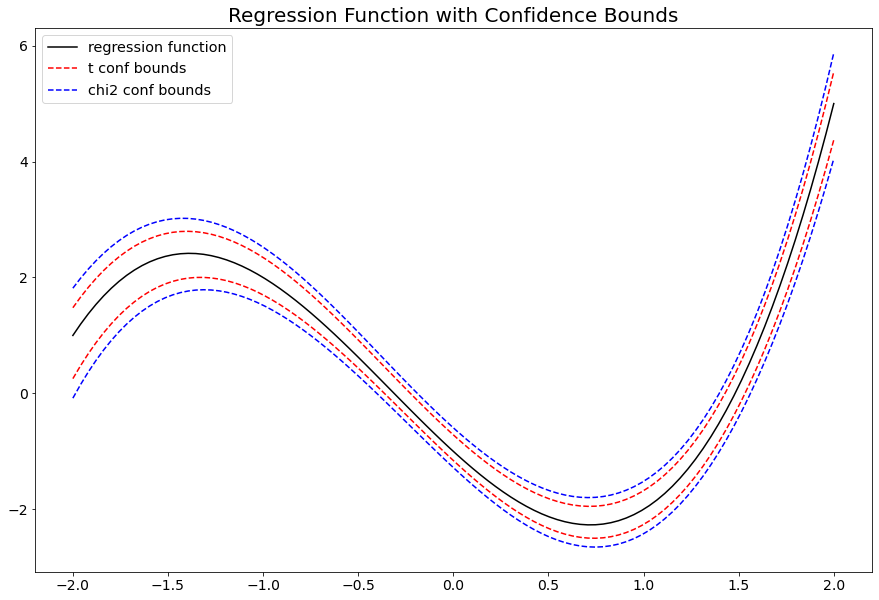

In [6]:
from confband import run_sim

beta = [-1, -3, 1, 1]
N = 100
sigma = 1
xmean = 0
xstdev = 1
alpha = 0.05
plot_range = None

run_sim(beta, alpha, N, sigma, xmean, xstdev, plot_range = plot_range)

## Exercise 3.3

Gauss–Markov theorem:

**(a)** Prove the Gauss–Markov theorem: the least squares estimate of a parameter $a^T \beta$ has variance no bigger than that of any other linear unbiased estimate of $a^T \beta$ (Section 3.2.2).

**(b)** The matrix inequality $\mathbf{B} \preccurlyeq \mathbf{A}$ holds if $\mathbf{A} − \mathbf{B}$ is positive semidefinite. Show that if $\hat{\mathbf{V}}$ is the variance-covariance matrix of the least squares estimate of $\beta$ and $\tilde{\mathbf{V}}$ is the variance-covariance matrix of any other linear unbiased estimate, then $\hat{\mathbf{V}} \preccurlyeq \tilde{\mathbf{V}}$ .

### Solution

**(a)** Let $\theta = a^T\beta$. The least squares estimator $\hat{\beta}$ of $\beta$ satisfies $\hat{\beta}\sim\mathcal{N}(\beta, \sigma^2(\mathbf{X}^T\mathbf{X})^{-1})$ so the least squares estimate $\hat{\theta} = a^T\hat{\beta}$ of $\theta$ has

\begin{equation}
    \text{Var}(\hat{\theta}) = \sigma^2a^T(\mathbf{X}^{-1}\mathbf{X})^{-1}a.
\end{equation}

Suppose $\tilde{\theta}=c^T\mathbf{y}$ is a linear unbiased estimator of $\theta$. Then

\begin{equation}
    \mathbf{y}\sim\mathcal{N}(\mathbf{X}\beta,\sigma^2I_N)
        \quad\Rightarrow\quad \tilde{\theta}\sim\mathcal{N}(c^T\mathbf{X}\beta, \sigma^2c^Tc).
\end{equation}

Since $\tilde{\theta}$ is unbiased for $\theta$,

\begin{equation}
    \text{E}(\tilde{\theta})=\theta
        \quad\Rightarrow\quad c^T\mathbf{X}\beta = a^T\beta
        \quad\Rightarrow\quad (c^T\mathbf{X} - a^T)\beta = 0.
\end{equation}

But this must hold for *every* $\beta\in\mathbb{R}^{p+1}$, so $c^T\mathbf{X} = a^T$. 

We have reduced the problem to showing that if $c^T\mathbf{X} = a^T$ then $c^Tc\geq a^T(\mathbf{X}^T\mathbf{X})^{-1}a$. We will establish this by showing that $a^T(\mathbf{X}^T\mathbf{X})^{-1}a$ is a global minimum for $\lVert c\rVert^2$ subject to the constraint $c^T\mathbf{X} = a^T$.

First, observe that a minimum exists since the solution set is non-empty (consider $c = (\mathbf{X}^{-1}\mathbf{X})^{-1}\mathbf{X}^T$), bounded below by 0, and closed. We will find it using Lagrange multipliers.

Let $\lambda\in\mathbb{R}^{p+1}$ be variables and define

\begin{equation}
    \mathcal{L}(c,\lambda) = \lVert c\rVert^2 = \lambda^T(\mathbf{X}^Tc - a).
\end{equation}

This satisfies

\begin{equation}
    \frac{\partial\mathcal{L}}{\partial c} = 2c - \mathbf{X}\lambda,
        \qquad \frac{\partial\mathcal{L}}{\partial c} = \mathbf{X}^Tc - a.
\end{equation}

At an extremum of our optimisation problem both of these are zero, so

\begin{align}
    c = \frac{1}{2}\mathbf{X}\lambda
        & \quad\Rightarrow\quad \frac{1}{2}\mathbf{X}^T\mathbf{X}\lambda = a \\
        & \quad\Rightarrow\quad \lambda = 2(\mathbf{X}^T\mathbf{X})^{-1}a \\
        & \quad\Rightarrow\quad c = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}a \\
        & \quad\Rightarrow\quad \tilde{\theta} = c^T\mathbf{y} = \hat{\theta}.
\end{align}

Since the Lagrange multiplier has a unique solution, this must be the global minimum of the constrained optimisation problem. In fact we have proved something slightly stronger: that $\hat{\theta}$ is the unique unbiased estimator with minimal variance.

**(b)** Our proof is analogous to that in part (a). The covariance matrix of $\hat{\beta}$ is $\text{Var}(\hat{\beta}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$. If $\tilde{\beta} = \mathbf{A}\mathbf{y}$ is another unbiased estimator for $\beta$ then $\tilde{\beta} \sim \mathcal{N}(\mathbf{A}\mathbf{X}\beta, \sigma^2\mathbf{A}\mathbf{A}^T)$. Since $\tilde{\beta}$ is unbiased, $\mathbf{A}\mathbf{X}\beta = \beta$ for all $\beta\in\mathbb{R}^{p+1}$ and so $\mathbf{A}\mathbf{X} = \mathbf{I}_{P+1}$. Thus we have reduced the problem to showing that if $\mathbf{A}$ is a $(p+1)\times N$ matrix with $\mathbf{A}\mathbf{X} = \mathbf{I}_{p+1}$ then $\mathbf{A}\mathbf{A}^T - (\mathbf{X}^T\mathbf{X})^{-1}$ is positive semi-definite, or equivalently

\begin{equation}
    v^T\mathbf{A}\mathbf{A}v \geq v^T(\mathbf{X}^T\mathbf{X})^{-1}v \quad \text{for all } v\in\mathbb{R}^{p+1}\setminus \{0\}.
\end{equation}

Again we treat this as a constrained optimisation problem and employ Lagrange multipliers. Fix $v\in\mathbb{R}^{p+1}$. The set $\{ \lVert\mathbf{A}^Tv\rVert^2 \mid \mathbf{A}\mathbf{X}=\mathbf{I}_{p+1}\}$ is non-empty (take $\mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$), bounded below by zero, and closed so has a minimum.

Let $\Lambda$ be a $(p+1)\times(p+1)$ matrix of variables and define

\begin{equation}
    \mathcal{L}(\mathbf{A},\Lambda) = \lVert \mathbf{A}^T v\rVert^2 - \Lambda \cdot(\mathbf{A}\mathbf{X} - \mathbf{I}_{p+1},
\end{equation}

where'$\cdot$' denotes the dot product. This has

\begin{equation}
    \frac{\partial\mathcal{L}}{\partial A} = 2vv^T\mathbf{A} - \Lambda\mathbf{X}^T,
        \qquad \frac{\partial\mathcal{L}}{\partial \Lambda} = \mathbf{A}\mathbf{X} - \mathbf{I}_{p+1}.
\end{equation}

At an extremum of the constrained optimisation problem both of these are zero, so

\begin{align}
    2vv^T\mathbf{A}\mathbf{X} = \Lambda\mathbf{X}^T\mathbf{X}
        & \quad\Rightarrow\quad 2vv^T  = \Lambda\mathbf{X}^T\mathbf{X} \\
        & \quad\Rightarrow\quad \Lambda = vv^T(\mathbf{X}^T\mathbf{X}^{-1}) \\
        & \quad\Rightarrow\quad vv^T\mathbf{A} = vv^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T.
\end{align}

Multiplying each term on the right by its transpose yields

\begin{align}
    vv^T\mathbf{A}\mathbf{A}^Tvv^T & = vv^T(\mathbf{X}^T\mathbf{X})^{-1}vv^T \\
    \left[v^T\mathbf{A}\mathbf{A}^Tv\right]vv^T & = \left[v^T(\mathbf{X}^T\mathbf{X})^{-1}v\right]vv^T \\
    v^T\mathbf{A}\mathbf{A}^Tv & = v^T(\mathbf{X}^T\mathbf{X})^{-1}v,
\end{align}

where the second line holds as both terms in square brackets are scalars and so commute with everything. Since the constrained optimisation problem has a minimum this must be it. This establishes the claim.

## Exercise 3.4

Show how the vector of least squares coefficients can be obtained from a single pass of the Gram–Schmidt procedure (Algorithm 3.1). Represent your solution in terms of the $QR$ decomposition of $\mathbf{X}$.

### Solution

To obtain $\hat{\beta}$ from the Gram-Schmidt process add an extra step $2^\prime$. Take $j\in\{1,\ldots, p\}$ and suppose that for $k<j$ we have written

\begin{equation}
    \mathbf{z}_k = \mathbf{x}_k + \sum_{l=0}^{k-1}\hat{\delta}_{lk}\mathbf{x}_l.
\end{equation}

Then we define coefficients $\hat{\delta}_{kj}$ for $k=0,\ldots, j-1$ by

\begin{align}
    \mathbf{z}_j
        & = \mathbf{x}_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj}\mathbf{z}_k \\
        & = \mathbf{x}_j - \sum_{k=0}^{j-1} \hat{\gamma}_{kj}\left(\mathbf{x}_k + \sum_{l=0}^k\hat{\delta}_{lk}\mathbf{x}_l\right) \\
        & = \mathbf{x}_j + \sum_{k=0}^{j-1}\hat{\delta}_{kj}\mathbf{x}_k.
\end{align}

Let $\Delta$ be the matrix with $\Delta_{ij}=\hat{\delta}_{ij}$ for $i<j$, ones on the diagonal, and zeros elsewhere. By construction,

\begin{equation}
    \mathbf{Z} = \mathbf{X}\Delta \quad\Rightarrow\quad \Delta = \Gamma^{-1}.
\end{equation}

By (3.32), $\hat{\beta} = \Gamma^{-1}\mathbf{Z}^T\mathbf{y} = \Delta\mathbf{Z}^T\mathbf{y}$ so we can calculate $\hat{\beta}$ explicitly:

\begin{equation}
    \hat{\beta}_j = \mathbf{z}_j+\sum_{k=j+1}^p\hat{\delta}_{jk}\mathbf{z}_k.
\end{equation}

## Exercise 3.5

Consider the ridge regression problem (3.41). Show that this problem is equivalent to the problem

\begin{equation}
\hat{\beta}^c = \underset{\beta^c}{\text{argmin}} \Bigg\{ \sum_{i=1}^N \big[ y_i - \beta_0^c  - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c\big]^2 + \lambda \sum_{j=1}^p (\beta_j^c)^2\Bigg\}.
\end{equation}

Give the correspondence between $\beta^c$ and the original $\beta$ in (3.41). Characterize the solution to this modified criterion. Show that a similar result holds for the lasso.

### Solution

Our solution is the same for both ridge regresssion and lasso. Since

\begin{equation}
    \beta_0^c + \sum_{j=1}^p(x_{ij} - \bar{x}_j)\beta_j^c 
        = \left( \beta_0^c - \sum_{j=1}^p \bar{x}_j\beta_j^c\right) + \sum_{j=1}^p x_{ij}\beta_j^c,
\end{equation}

the two minimisation problems are equivalent with 

\begin{equation}
    \beta_0^c = \beta_0 + \sum_{j=1}^p \bar{x}_j\beta_j = \frac{1}{N}\sum_{i=1}^N \hat{y}_i
\end{equation}

and $\beta_j^c = \beta_j$ for $j\neq 0$.

At the minimum, the derivative with respect to $\beta_0^c$ of the expression in braces is zero, so

\begin{align}
    \sum_{i=1}^N \left[ y_i - \beta_0^c  - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c \right] = 0 \quad
        \Rightarrow \quad \left( \sum_{i=1}^N y_i \right) - N\beta_0^c - 0 = 0
\end{align}

and thus the solution to the modified criterion is $\beta_0^c = \bar{y}$, $\beta_j^c = \beta_j$ for $j>0$.

### Exercise 3.6

Show that the ridge regression estimate is the mean (and mode) of the posterior distribution, under a Gaussian prior $\beta\sim \mathcal{N}(0, \tau^2 \mathbf{I})$, and Gaussian sampling model $y\sim\mathcal{N}(\mathbf{X}\beta, \sigma^2\mathbf{I})$. Find the relationship between the regularization parameter $\lambda$ in the ridge formula, and the variances $\tau^2$ and $\sigma^2$.

### Solution

The posterior distribution for $\beta$ has density function

\begin{align}
    f_{\beta\mid Y_1, \ldots, Y_N}(\beta)
        & \propto f_{Y_1, \ldots, Y_N\mid\beta}(y_1,\ldots, y_N)f_{\beta}(\beta) \\
        & = \left(\prod_{i=1}^N f_{Y\mid\beta}(y_i)\right) f_{\beta}(\beta) \\
        & \propto \text{exp}\left( -\frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - x_i^T\beta)^2 - \frac{1}{\tau^2}\lVert \beta\rVert^2\right)\\
        & = \text{exp}\left( -\frac{1}{2\sigma^2}\left( \lVert\mathbf{y} - \mathbf{X}\beta\rVert^2 + \frac{\sigma^2}{\tau^2}\lVert\beta\rVert^2\right)\right).
\end{align}

So the mode of this distribution is

\begin{equation}
    \underset{\beta}{\text{argmax}} \left(f_{\beta\mid Y_1, \ldots, Y_N}(\beta)\right)
        = \underset{\beta}{\text{argmin}}\left(\lVert\mathbf{y} - \mathbf{X}\beta\rVert^2 + \frac{\sigma^2}{\tau^2}\lVert\beta\rVert^2\right).
\end{equation}

This is the ridge regression estimate with $\lambda = \sigma^2/\tau^2$. Moreover, since the posterior is Gaussian (p.64) the mean equals the mode.

## Exercise 3.7

Assume $y_i\sim\mathcal{N}(\beta_0+x_i^T \beta, \sigma^2)$, $i=1,2,...,N$, and the parameters $\beta_j$, $j = 1,...,p$ are each distributed as $\mathcal{N}(0, \tau^2)$, independently of one another. Assuming $\sigma^2$ and $\tau^2$ are known, and $\beta_0$ is not governed by a prior (or has a flat improper prior), show that the (minus) log-posterior density of $\beta$ is proportional to $\sum_{i=1}^N(y_i − \beta_0 − \sum_j x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^p \beta_j^2$ where $\lambda = \sigma^2/\tau^2$.

### Solution

This follows from the solution to exercise 3.6.

## Exercise 3.8

Consider the $QR$ decomposition of the uncentered $N \times (p + 1)$ matrix $\mathbf{X}$ (whose first column is all ones), and the SVD of the $N \times p$ centered matrix $\tilde{\mathbf{X}}$. Show that $Q_2$ and $U$ span the same subspace, where $Q_2$ is the sub-matrix of $Q$ with the first column removed. Under what circumstances will they be the same, up to sign flips?

### Solution

For $j=1,\ldots,p$, the Gram-Schmidt algorithm implies

\begin{align}
    \mathbf{x}_j 
        &  = \mathbf{z}_j + \sum_{k=0}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k \\
    \Rightarrow\mathbf{x}_j -\hat{\gamma}_{0j}\mathbf{z}_0 
        & = \mathbf{z}_j + \sum_{k=1}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k.
\end{align}

By definition,

\begin{equation}
    \hat{\gamma}_{0j} 
        = \frac{\langle\mathbf{z}_0,\mathbf{x}_j\rangle}{\langle\mathbf{z}_0,\mathbf{z}_0\rangle}
        = \frac{1}{N}\sum_{k=1}^Nx_{jk}
\end{equation}

equals the mean of $\mathbf{x}_j$; that is, the $j$th column $\tilde{\mathbf{x}}_j$ of $\tilde{\mathbf{X}}$. Since $\mathbf{z}_1,\ldots,\mathbf{z}_p$ are scalar multiples of the columns of $Q_2$ this implies that the column space of $Q_2$ contains the column space of $\tilde{\mathbf{X}}$. By dimensions they are equal. The column space of $U$ equals that of $\tilde{\mathbf{X}}$ by definition and the first claim follows.

Moving on to the second part, let $R_2$ be the $p\times p$ submatrix of $R$ obtained by removing its first row and column. Observe that $\tilde{\mathbf{X}}=Q_2R_2$ is the $QR$ decomposition of $\tilde{\mathbf{X}}$, we can forget $\mathbf{X}$ and work entirely with the SVD and $QR$ decompositions of $\tilde{\mathbf{X}}$.

We claim that the columns of $Q_2$ equal those of $U$ up to sign flips if and only if $\tilde{\mathbf{X}}$ (equivalently $\mathbf{X}$) has orthogonal columns.

First assume that $\tilde{\mathbf{X}}$ has orthogonal columns. Take a permutation $\sigma\in S_p$ such that $\lVert\tilde{\mathbf{x}}_{\sigma(1)}\rVert\geq\cdots\geq\lVert\tilde{\mathbf{x}}_{\sigma(p)}\rVert$. Let $P=P_{\sigma}$ be the corresponding permutation matrix whose $j$th column is the standard basis vector $e_{\sigma(j)}$ so that $\tilde{\mathbf{X}}P$ has columns $\tilde{\mathbf{x}}_{\sigma(1)},\ldots ,\tilde{\mathbf{x}}_{\sigma(p)}$. Let $D$ be the diagonal matrix with $j$th diagonal entry $\lVert \tilde{\mathbf{x}}_{\sigma(j)}\rVert$, let $U=\tilde{\mathbf{X}}PD^{-1}$, and let $V = P$. 

We claim that $\tilde{\mathbf{X}}=UDV^T$ is the SVD of $\tilde{\mathbf{X}}$. Indeed, since the columns $\tilde{\mathbf{X}}$ are orthogonal, the columns of $U$ are orthonormal and so $U$ and $V$ are orthogonal matrices. Moreover, if $j\in\{1,\ldots,p\}$ then $\tilde{\mathbf{X}}v_j$ is the $j$th column of $\tilde{\mathbf{X}}P=(\tilde{\mathbf{X}}PD^{-1})D$ so equals $d_ju_j$. Finally, $\tilde{\mathbf{X}}^Tu_j$ equals the $j$th column of $\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}$. Since $U$ is orthogonal,

\begin{equation}
    U^TU=I
        \quad\Rightarrow\quad D^{-1}P^T\tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}=I
        \quad\Rightarrow\quad \tilde{\mathbf{X}}^T\tilde{\mathbf{X}}PD^{-1}=PD,
\end{equation}

so $\tilde{\mathbf{X}}^Tu_j=d_jv_j$. Thus $U$ and $V$ consist of left- and right-singular vectors of $\tilde{\mathbf{X}}$ respectively and $\tilde{\mathbf{X}}=UDV^T$ is its SVD.

It just remains to note that since the columns of $\tilde{\mathbf{X}}$ are orthogonal its $QR$-decomposition consists of $Q_2=\tilde{\mathbf{X}}D^{-1}$ and $R_2=D$. Observe that $Q_2$ and $U$ have the same columns up to permutation.

For the converse, assume that $Q_2$ and $U$ have the same columns up to permutation and sign. Then there exists a permutation matrix $P=P_{\sigma}$ and a diagonal matrix $S$ with $\pm1$ on the diagonal such that $U=Q_2PS$. So

\begin{equation}
    Q_2R_2=UDV^T
        \qquad\Rightarrow\qquad Q_2R_2=Q_2PSDV^T
        \qquad\Rightarrow\qquad R_2 = PSDV^T,
\end{equation}

since $Q_2$ is orthogonal so has a left-inverse. This implies that

\begin{equation}
    R_2^TR_2 = (SPDV^T)(VDP^TS)=SPD^2P^TS=D^2,
\end{equation}

so $R_2$ is upper triangular with orthogonal columns and hence diagonal. Therefore $\tilde{\mathbf{X}}=Q_2R_2$ has orthogonal columns.

A corollary of our proof is the following: the columns of $Q_2$ and $U$ are equal *with the same ordering* if and only if $\tilde{\mathbf{X}}$ is orthogonal with $\lVert\tilde{\mathbf{x}}_{1}\rVert\geq\cdots\geq\lVert\tilde{\mathbf{x}}_{p}\rVert$.

## Exercise 3.9

*Forward stepwise regression.* Suppose we have the $QR$ decomposition for the $N \times q$ matrix $\mathbf{X}_1$ in a multiple regression problem with response $\mathbf{y}$, and we have an additional $p−q$ predictors in the matrix $\mathbf{X}_2$. Denote the current residual by $\mathbf{r}$. We wish to establish which one of these additional variables will reduce the residual-sum-of squares the most when included with those in $\mathbf{X}_1$. Describe an efficient procedure for doing this.

### Solution

Let $\mathbf{X}_1=\mathbf{Q}_1\mathbf{R}_1$ be the QR decomposition of $\mathbf{X}_1$ and let $\mathbf{q}_0, \ldots, \mathbf{q}_q$ denote the columns of $\mathbf{X}_1$. The current residual is $\mathbf{r} = \mathbf{y} - \mathbf{Q}_1\mathbf{Q}_1^T\mathbf{y}$ so the residual sum of squares is

\begin{align}
    \lVert \mathbf{y} - \mathbf{Q}_1\mathbf{Q}_1^T\mathbf{y} \rVert^2
        & = \lVert \mathbf{y} - \sum_{j=0}^q \mathbf{q}_j \mathbf{q}_j^T \mathbf{y}\rVert ^2 \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q 2\langle \mathbf{y}, \mathbf{q}_j\mathbf{q}_j^T\mathbf{y}\rangle
            + \sum_{j=0}^q\sum_{k=0}^q \langle \mathbf{q}_j\mathbf{q}_j^T\mathbf{y}, \mathbf{q}_k\mathbf{q}_k^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q 2\langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{y}\rangle
            + \sum_{j=0}^q\sum_{k=0}^q \langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{q}_k\mathbf{q}_k^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q \langle \mathbf{q}_j^T\mathbf{y}, \mathbf{q}_j^T\mathbf{y}\rangle \\
        & = \lVert \mathbf{y} \rVert^2 
            - \sum_{j=0}^q ( \mathbf{q}_j^T\mathbf{y})^2.
\end{align}

Adding another variable corresponds to adding another column $\mathbf{q}$ to $\mathbf{Q}_1$. Since $\mathbf{q}$ is a normalised version of the Gram-Schmidt vector $\mathbf{z}$, we can choose which variable to include as follows: for each column $\mathbf{x}$ of $\mathbf{X}_2$, calculate

\begin{equation}
    \mathbf{z} = \mathbf{x}-\sum_{k=0}^q \langle \mathbf{q}_k, \mathbf{x}\rangle\mathbf{q}_k
\end{equation}

and pick the variable for which $\lvert\mathbf{z}^T\mathbf{y}\rvert\big/ \lVert\mathbf{z}\rVert$ is maximal.

Because it follows relatively easy, we deduce a full procedure for forward-stepwise regression. This is implemented in `stepsel.py`.

We run a loop for $k=0, \ldots, p$. At the start of step $k$ assume that we have:
- $\mathcal{A}$: a set of $k$ active variables
- $RSS$: the residual sum-of-squares at the end of the previous step
- $\mathbf{B}$: a $(p+1)\times k$ matrix whose $j$th column gives the approximation to $\beta$ at the end of the $j$th step
- $\mathbf{Q}$: an $N\times k$ matrix that gives the $QR$-decomposition for $\mathbf{X}$ restricted to the active columns
- $\mathbf{R}_{\text{inv}}$: a $(p+1)\times k$ matrix whose restriction to its $k$ non-zero rows gives the $\mathbf{R}^{-1}$ in the QR-decomposition described above.

In the $k$th step let $\mathbf{M}=\mathbf{I}_{p+1} - \mathbf{R}_{\text{inv}}\mathbf{Q}^T\mathbf{X}$ and consider

\begin{equation}
    \mathbf{X}\mathbf{M} 
        = \mathbf{X} - \mathbf{X}\mathbf{R}_{\text{inv}}\mathbf{Q}^T\mathbf{X}
        = \mathbf{X} - \mathbf{Q}\mathbf{Q}^T\mathbf{X}.
\end{equation}

The $j$th column of this is

\begin{equation}
    \mathbf{x}_j-\sum_{a\in\mathcal{A}} \langle \mathbf{q}_a, \mathbf{x}_j\rangle\mathbf{q}_a
\end{equation}

and so right multiplication by $\mathbf{M}$ gives the orthogonal projection of $\mathbf{X}$ onto the space spanned by its active columns. In particular, the columns of $\mathbf{X}\mathbf{M}$ indexed by the active set are zero.

Rescale the columns of $\mathbf{M}$ such that the columns of $\mathbf{X}\mathbf{M}$ have unit norm. Let $j$ be the index at which the element-wise square of $(\mathbf{X}\mathbf{M})^T\mathbf{y}$ is greatest and let $m$ denote this maximal value. By the solution to Exercise 3.9 described above, $j$ is the index that will decrease the $RSS$ the most and $m$ is the amount it will decrease by. So, at the end of this step we add $j$ to the active set, subtract $m$ from $RSS$, and append the $j$th columns of $\mathbf{M}$ and $\mathbf{X}\mathbf{M}$ to $\mathbf{R}_{\text{inv}}$ and $\mathbf{Q}$ respectively. The new approximation to $\beta$ is $\mathbf{R}_{\text{inv}}\mathbf{Q}^T\mathbf{y}$.

## Exercise 3.10

*Backward stepwise regression.* Suppose we have the multiple regression fit of $\mathbf{y}$ on $\mathbf{X}$, along with the standard errors and $Z$-scores as in Table 3.2. We wish to establish which variable, when dropped, will increase the residual sum-of-squares the least. How would you do this?

### Solution

As in the defintion of the $F$ statistic (3.13), let $RSS_1$ denote the residual sum of squares for the existing model and $RSS_0$ the same quantity for the model with one variable removed. We wish to choose the variable which minimises $RSS_0$. This is equivalent to minimising the $F$ statistic

\begin{equation}
    F=\frac{RSS_0-RSS_1}{RSS_1 \big/ (N-p-1)}
\end{equation}

or its square root. But by exercise 3.1 $\sqrt{F}$ equals the $Z$-score. Thus eliminating the variable with the lowest $Z$-score will increase the residual sum of squares the least.

We will now describe an efficient full procedure for backward-stepwise selection. This is implemented in `stepsel.py`.

We run a loop for $k=0,\ldots,p$. At the start of the $k$th step we have:
- $\mathcal{A}$: a set of $p+1-k$ active variables
- $RSS$: the residual sum-of-squares at the end of the previous step
- $\mathbf{B}$: a $(p+1)\times k$ matrix whose $j$th column gives the approximation to $\beta$ at the start of the $j$th step
- $\mathbf{Q}$: an $N\times (p+1-k)$ matrix that gives the $QR$-decomposition for $\mathbf{X}$ restricted to the active columns
- $\mathbf{R}_{\text{inv}}$: a $(p+1-k)\times (p+1-k)$ matrix that gives the $\mathbf{R}^{-1}$ in the QR-decomposition described above.

At the start, $\mathcal{A}=\{0, \ldots, p\}$, $\mathbf{B}$ is empty, $\mathbf{Q}$ and $\mathbf{R}_{\text{inv}}$ come from the $QR$ decomposition of $\mathbf{X}$, and

\begin{equation}
    RSS = \lVert \mathbf{y}-\hat{\mathbf{y}}\rVert^2
        = \lVert\mathbf{y}-\mathbf{Q}\mathbf{Q}^T\mathbf{y}\rVert^2
        =\mathbf{y}^T (\mathbf{I}_N - \mathbf{Q}\mathbf{Q}^T)^2\mathbf{y}.
\end{equation}

In the $k$th step we calculate the current approximation $\mathbf{R}_{\text{inv}}\mathbf{Q}^T\mathbf{y}$ to $\beta$ and add it as the last column of $\mathbf{B}$. Then we examine the $Z$-scores to determine which feature to remove. We can ignore the constant $\hat{\sigma}$. Moreover, $v_j$ is the $j$th diagonal element of $\mathbf{R}_{\text{inv}} \mathbf{R}_{\text{inv}}^T$, which equals the square norm of the $j$th row of $\mathbf{R}_{\text{inv}}$. Thus it suffices to examine $\hat{\beta}$ (the last column of $\mathbf{B}$) divided element-wise by the row norms of $\mathbf{R}_{\text{inv}}$ and remove the index $j$ with the smallest value.

We then calculate the new residual sum-of-squares $RSS + (\mathbf{q}_j^T\mathbf{y})^2$, remove the $j$th column and the $j$th row and column from $\mathbf{Q}$ and $\mathbf{R}_{\text{inv}}$ respectively, and remove $j$ from $\mathcal{A}$.

By keeping track of things as we go we end with the list of variables in the order they were removed, the approximation to $\beta$ at each step, and the $RSS$ at each step.

## Exercise 3.11

Show that the solution to the multivariate linear regression problem (3.40) is given by (3.39). What happens if the covariance matrices $\Sigma_i$ are different for each observation?

### Solution

We wish the find the minimum of

\begin{equation}
    RSS(\mathbf{B};\Sigma) = \sum_{i=1}^N(y_i-f(x_i))^T\Sigma^{-1}(y_i-f(x_i)).
\end{equation}

Let $a_{ij}$ denote the $(i,j)$ entry of $\Sigma^{-1}$. Note that since $\Sigma$ is a covariance matrix, both it and its inverse are symmetric. We can expand $RSS$ into

\begin{equation}
    RSS=\sum_{i=1}^N\sum_{k=1}^K\sum_{l=1}^K(y_{ik}-f_k(x_i))a_{kl}(y_{il}-f_l(x_i)),
\end{equation}

where $f_k(x_i)=\sum_{j=0}^p x_{ij}\beta_{jk}$ is the $(i,k)$ entry of $\mathbf{X}\mathbf{B}$. This implies that

\begin{equation}
    \frac{\partial RSS}{\partial \beta_{mn}}
         = -2\sum_{i=1}^N x_{im}\left(\sum_{k=1}^K (y_{ik}-f_k(x_i))a_{kn}\right) \\
    \Rightarrow \frac{\partial RSS}{\partial \mathbf{B}}
        = -\mathbf{X}^T(\mathbf{Y}-\mathbf{X}\mathbf{B})\Sigma^{-1}.
\end{equation}

Since $RSS$ is bounded below and quadratic in $\mathbf{B}$ it has a global minimum. Setting $\frac{\partial RSS}{\partial \mathbf{B}}=0$ gives the unique solution $\hat{\mathbf{B}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$ (assuming $\mathbf{X}$ has full column rank). So the solution is the same as $K$ uncorrelated regressions.

If the covariance matrices $\Sigma_i$ are different for different observations then we need to minimise

\begin{equation}
    RSS(\mathbf{B};\Sigma) = \sum_{i=1}^N(y_i-f(x_i))^T\Sigma_i^{-1}(y_i-f(x_i)).
\end{equation}

Let $a^{(i)}_{jk}$ denote the $(j,k)$ entry of $\Sigma_i^{-1}$. Then 

\begin{equation}
    \frac{\partial RSS}{\partial \beta_{mn}}
         = -2\sum_{i=1}^N x_{im}\left(\sum_{k=1}^K (y_{ik}-f_k(x_i))a^{(i)}_{kn}\right).
\end{equation}

If $\mathbf{Z}$ denotes the matrix whose $i$th row is the $i$th row of $(\mathbf{Y}-\mathbf{X}\mathbf{B})\Sigma^{-1}$ then $\frac{\partial RSS}{\partial \mathbf{B}}=-\mathbf{X}^T\mathbf{Z}$. Again, $RSS$ must have a global minimum at which $\mathbf{X}^T\mathbf{Z}=0$. Since this is a system of linear equations in the $\beta_{ij}$ it's easy to find the solutions in practice but I cannot find a closed-form solution.

## Exercise 3.12

Show that the ridge regression estimates can be obtained by ordinary least squares regression on an augmented data set. We augment the centered matrix $\mathbf{X}$ with $p$ additional rows $\sqrt{\lambda}\mathbf{I}$, and augment $\mathbf{y}$ with $p$ zeros. By introducing artificial data having response value zero, the fitting procedure is forced to shrink the coefficients toward zero. This is related to the idea of hints due to Abu-Mostafa (1995), where model constraints are implemented by adding artificial data examples that satisfy them.

### Solution

Let $\tilde{\mathbf{X}}$ and $\tilde{\mathbf{y}}$ denote the augmented matrix and vector, respectively. Without loss of generality we assume that the new rows have been added at the bottom. Then

\begin{equation}
    \tilde{\mathbf{X}}^T\tilde{\mathbf{X}} = \mathbf{X}^T\mathbf{X} + (\sqrt{\lambda}\mathbf{I}_p)^T(\sqrt{\lambda}\mathbf{I}_p) = \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}_p
\end{equation}

and $\tilde{\mathbf{X}}^T\tilde{\mathbf{y}} = \mathbf{X}^T\mathbf{y}$, so the least squares estimate using $\tilde{\mathbf{X}}$ and $\tilde{\mathbf{y}}$ is

\begin{equation}
    (\tilde{\mathbf{X}}^T\tilde{\mathbf{X}})^{-1}\tilde{\mathbf{X}}^T\tilde{\mathbf{y}}
         = (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I}_p)^{-1}\mathbf{X}^T\mathbf{y};
\end{equation}

the ridge regression estimate for the non-augmented data.

## Exercise 3.13

Derive the expression (3.62), and show that $\hat{\beta}^{\text{pcr}}(p)=\hat{\beta}^{\text{ls}}$.

### Solution


For the first part observe that

\begin{equation}
    \hat{\mathbf{y}}^{\text{pcr}}=\sum_{m=1}^M \hat{\theta}_m\mathbf{z}_m=\sum_{m=1}^M \hat{\theta}_m\mathbf{X}v_m=\mathbf{X}\left(\sum_{m=1}^M \hat{\theta}_mv_m\right),
\end{equation}

so $\hat{\beta}^{\text{pcr}}(M) = \sum_{m=1}^M \hat{\theta}_mv_m$. The second part follows from the fact that $\mathbf{X}$ and $\mathbf{Z}=\mathbf{U}\mathbf{D}$ have the same column space, but we can also show it explicitly. Using the SVD decomposition $\mathbf{X}=\mathbf{U}\mathbf{D}\mathbf{V}^T$,

\begin{align}
    \hat{\beta}^{\text{ls}}
        & = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
        & = (\mathbf{V}\mathbf{D}^2\mathbf{V}^T)^{-1}\mathbf{V}\mathbf{D}\mathbf{U}^T\mathbf{y} \\
        & = \mathbf{V}\mathbf{D}^{-1}\mathbf{U}^T\mathbf{y} \\
        & = \mathbf{V}\mathbf{D}^{-2}\mathbf{Z}^T\mathbf{y} \\
        & = \sum_{m=1}^p \frac{\langle\mathbf{z}_m,\mathbf{y}\rangle}{d_m^2}v_m.
\end{align}

We're done since $\lVert\mathbf{z}_m\rVert = d_m^2$.

## Exercise 3.14

Show that in the orthogonal case, PLS stops after $m = 1$ steps, because subsequent $\varphi_{mj}$ in step 2 in Algorithm 3.3 are zero.

### Solution

It suffices to show that $\langle\mathbf{x}_j^{(1)},\mathbf{y}\rangle=0$ for all $j$, or equivalently that

\begin{equation}
    \frac{\langle\mathbf{z}_0,\mathbf{x}_j\rangle}{\langle\mathbf{z}_0,\mathbf{z}_0\rangle}\langle\mathbf{z}_0,\mathbf{y}\rangle=\langle \mathbf{x}_j,\mathbf{y}\rangle.
\end{equation}

Using the fact that the $\mathbf{x}_j$ are orthonormal (they have norm one since they are standardised with mean zero and unit variance) we have

\begin{equation}
    \langle\mathbf{z}_0,\mathbf{x}_j\rangle
         = \langle \mathbf{x}_j,\mathbf{y}\rangle\lVert \mathbf{x}_j\rVert^2
          = \langle \mathbf{x}_j,\mathbf{y}\rangle, \\
    \langle\mathbf{z}_0,\mathbf{z}_0\rangle
         = \sum_{k=1}^p \langle\mathbf{x}_k,\mathbf{y}\rangle^2\lVert \mathbf{x}_k\rVert^2
          = \sum_{k=1}^p \langle\mathbf{x}_k,\mathbf{y}\rangle^2, \\
    \langle\mathbf{z}_0,\mathbf{y}\rangle
         = \sum_{k=1}^p \langle\mathbf{x}_k,\mathbf{y}\rangle^2.
\end{equation}

The claim follows.

## Exercise 3.15

Verify expression (3.64), and hence show that the partial least squares directions are a compromise between the ordinary regression coefficient and the principal component directions.

### Solution

We start with $m=1$. Note that

\begin{equation}
    \text{Corr}^2(\mathbf{y},\mathbf{X}\alpha)\text{Var}(\mathbf{X}\alpha)
        = \frac{\text{Cov}^2(\mathbf{y},\mathbf{X}\alpha)}{\text{Var}(\mathbf{y})\text{Var}(\mathbf{X}\alpha)}\text{Var}(\mathbf{X}\alpha),
\end{equation}

so maximising this over $\lVert\alpha\rVert=1$ is equivalent to maximising $\mathbf{y}^T\mathbf{X}\alpha$. We have

\begin{equation}
    \mathbf{y}^T\mathbf{X}\alpha
        = \langle\mathbf{X}^T\mathbf{y}, \alpha\rangle
        = \lVert \mathbf{X}^T\mathbf{y}\rVert\lVert\alpha\rVert\cos(\theta),
\end{equation}

so this is maximised at $\alpha = \mathbf{X}^T\mathbf{y}\big/\lVert\mathbf{X}^T\mathbf{y}\rVert$, which equals $\hat{\varphi}_1$ up to a scalar.

Now take $m>1$. The sample covariance matrix is $\mathbf{S}=\frac{1}{N}\mathbf{X}^T\mathbf{X}$ so we need to maximise $\mathbf{y}^T\mathbf{X}\alpha$ subject to $\lVert\alpha\rVert=1$ and $\langle \mathbf{X}\alpha,\mathbf{z}_l\rangle=0$ for $l<m$. Let $\pi$ denote projection from $\mathbb{R}^p$ onto the subspace spanned by $\{\mathbf{z}_1,\ldots,\mathbf{z}_{m-1}\}$, where $\mathbf{z}_l=\mathbf{X}\hat{\varphi}_l$. Note that $(1-\pi)(\mathbf{x}_j)=\mathbf{x}_j^{(m-1)}$ for all $j$. 

The condition $\langle \mathbf{X}\alpha,\mathbf{z}_l\rangle=0$ for $l<m$ is equivalent to $(1-\pi)(\mathbf{X}\alpha)=\mathbf{X}\alpha$. However, 

\begin{equation}
    (1-\pi)\left(\mathbf{X}\alpha\right)
        = (1-\pi)\left(\sum_{j=1}^p \alpha_j\mathbf{x}_j\right)
        = \sum_{j=1}^p \alpha_j\mathbf{x}^{(m-1)}_j
        = \mathbf{X}^{(m-1)}\alpha,
\end{equation}

where $X^{(m-1)}$ is the matrix whose $j$th column is $\mathbf{x}^{(m-1)}_j$, so the orthogonality condition holds iff $\mathbf{X}\alpha = \mathbf{X}^{(m-1)}\alpha$. If so then 

\begin{equation}
    \mathbf{y}^T\mathbf{X}\alpha
        = \mathbf{y}^T\mathbf{X}^{(m-1)}\alpha
        = \langle(\mathbf{X}^{(m-1)})^T\mathbf{y}, \alpha\rangle
        = \lVert (\mathbf{X}^{(m-1)})^T\mathbf{y}\rVert\lVert\alpha\rVert\cos(\theta).
\end{equation}

Clearly this is maximised at $\alpha = (\mathbf{X}^{(m-1)})^T\mathbf{y} \big/ \big\lVert(\mathbf{X}^{(m-1)})^T\mathbf{y}\big\rVert$, which equals $\hat{\varphi}_m$ up to a scalar.

Note that as a corollary we have $\mathbf{z}_m=\sum_j \hat{\varphi}_{mj}\mathbf{x}^{(m-1)}_j=\sum_j \hat{\varphi}_{mj}\mathbf{x}_j$.

For the second part, note that the principal component directions maximise $\text{Var}(\mathbf{X}\alpha)$ and the partial least squares directions maximise $\text{Corr}^2(\mathbf{y},\mathbf{X}\alpha)\text{Var}(\mathbf{X}\alpha)$. We claim that the ordinary regression coefficient $\hat{\beta}$ maximises $\text{Corr}^2(\mathbf{y},\mathbf{X}\beta)$ and hence PLS is a compromise between the other two.

It suffices to maximise the log

\begin{equation}
    C = \ln \left(\text{Corr}^2(\mathbf{y},\mathbf{X}\beta)\right)
      = 2\ln\langle\mathbf{y},\mathbf{X}\beta\rangle - \ln\langle y,y\rangle - \ln \langle\mathbf{X}\beta,\mathbf{X}\beta\rangle.
\end{equation}

This has partial derivative

\begin{equation}
    \frac{\partial C}{\partial \beta} = 2\left[ \frac{\mathbf{X}^T\mathbf{y}}{\langle\mathbf{y},\mathbf{X}\beta\rangle} - \frac{\mathbf{X}^T\mathbf{X}\beta}{\langle\mathbf{X}\beta,\mathbf{X}\beta\rangle}\right].
\end{equation}

Setting this to zero yields

\begin{equation}
    \frac{\langle\mathbf{y},\mathbf{X}\beta\rangle}{\langle\mathbf{X}\beta,\mathbf{X}\beta\rangle} \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}=\hat{\beta},
\end{equation}

so $\beta$ must be a scalar multiple of $\hat{\beta}$. In fact any non-zero multiple satisfies the equation.

It remains to show that this is a maximum. However, note that $\text{Corr}^2(\mathbf{y},\mathbf{X}\beta)$ is invariant under scaling of $\beta$. On the closed, bounded set $\{\beta\mid\lVert\beta\rVert=1\}$ the function must have both a maximum and a minimum. Thus the extremum $\beta=\hat{\beta}$ we found must be a global maximum (the minimum - zero - didn't show up in our analysis as $C$ is undefined when the correlation is zero).

## Exercise 3.16

Derive the entries in Table 3.4, the explicit forms for estimators in the orthogonal case.

### Solution

Assume that the columns of $\mathbf{X}$ are orthonormal. We go through the different methods in order.

*Best subset*: First note that if a variable $\mathbf{x}_j$ is included in the subset then its coefficient $\hat{\beta}_j=\langle\mathbf{x}_j,\mathbf{y}\rangle$ is independent of what other variables are included. Take $S\subseteq\{0,\ldots,p\}$ and let $\beta=(\beta_j)$ where $\beta_j=\hat{\beta}_j$ if $j\in S$ and zero otherwise. Then

\begin{align}
    \lVert \mathbf{y}-\mathbf{X}^T\beta\rVert^2
        & = \big\lVert \mathbf{y}-\sum_{j\in S}\beta_j\mathbf{x}_j\big\rVert^2 \\
        & = \lVert\mathbf{y}\rVert^2 
            - 2\sum_{j\in S}\langle\mathbf{x}_j,\mathbf{y}\rangle^2 
            + \sum_{j,k\in S}\langle\mathbf{x}_j,\mathbf{y}\rangle \langle\mathbf{x}_k,\mathbf{y}\rangle \langle\mathbf{x}_j,\mathbf{x}_k\rangle\\
        & = \lVert\mathbf{y}\rVert^2 - \sum_{j\in S}\langle\mathbf{x}_j,\mathbf{y}\rangle^2.
\end{align}

So the best subset of size $M$ consists of the $M$ indices with the greatest $\lvert \hat{\beta}_j\rvert$. This implies the claim.

*Ridge*: If $X$ has orthonormal columns then $\mathbf{X}^T\mathbf{X}=\mathbf{I}$ so the ridge estimate is

\begin{equation}
    \beta=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}=\frac{1}{1+\lambda}\hat{\beta}
\end{equation}

as required.

*Lasso*: Consider the LAR path. Take the variable $\mathbf{x}_j$ with the greatest absolute correlation with $\mathbf{y}$. We begin moving along the path $\hat{\mathbf{f}}(\alpha)=\alpha \langle\mathbf{x}_j,\mathbf{y}\rangle\mathbf{x}_j$ for $\alpha\in[0,1]$. Along this path the correlations with residuals are given by

\begin{equation}
    \lvert\langle\mathbf{x}_k, \mathbf{y}-\hat{\mathbf{f}}(\alpha)\rangle\rvert = 
        \begin{cases}
            (1-\alpha)\lvert\langle \mathbf{x}_j,\mathbf{y}\rangle\rvert & \text{ if } j=k, \\
            \lvert\langle \mathbf{x}_k,\mathbf{y}\rangle\rvert & \text{ otherwise.}
        \end{cases}
\end{equation}

Thus we continue along the current path until $(1-\alpha)\lvert\langle \mathbf{x}_j,\mathbf{y}\rangle\rvert = \lvert\langle \mathbf{x}_k,\mathbf{y}\rangle\rvert$ for some $k\neq j$ at which point we include $k$ in the active set. As above, the coefficient of $\mathbf{x}_k$ will only affect the correlation of $\mathbf{x}_k$ with the residual. Thus

Thus the coefficient $\beta_l$ of $\mathbf{x}_l$ is zero until the shared absolute covariance $\lambda$ is greater than $\lvert\langle\mathbf{x}_l,\mathbf{y}\rangle\rvert$, after which it increases at the same rate that $\lambda$ increases. More precisely, when the shared covariance is $\lambda$, the coefficient of $\mathbf{x}_l$ is

\begin{equation}
    \beta_l = 
        \begin{cases}
            0 & \text{ if } \lambda > \lvert\langle\mathbf{x}_l,\mathbf{y}\rangle\rvert, \\
            \text{sign}(\langle\mathbf{x}_l,\mathbf{y}\rangle \left(\lvert\langle \mathbf{x}_l,\mathbf{y}\rangle\rvert - \lambda\right) & \text{ otherwise.}
        \end{cases}
\end{equation}

This agrees with the entry in Table 3.4. Indeed, since no coefficient in the LAR path ever hits zero after being added to the active set, it is identical to the Lasso path.

## Exercise 3.17

Repeat the analysis of Table 3.3 on the spam data discussed in Chapter 1.

### Solution

This analysis can be found in `spam-data/spam-regression-analysis.ipynb`. The test errors were as follows:

| Least-Squares | Forward-Stepwise | Ridge | Lasso | PCR | PLS |
| --- | --- | --- | --- | --- | --- |
| 0.1160 | 0.1162 | 0.1141 | 0.1163 | 0.1196 | 0.1163 |

Note that best subset couldn't be performed because there were too many featuresm, so forward-stepwise selection was substituted.

## Exercise 3.18

Read about conjugate gradient algorithms (Murray et al., 1981, for example), and establish a connection between these algorithms and partial least squares.

### Solution

**TODO**

## Exercise 3.19

Show that $\lVert \hat{\beta}^{\text{ridge}}\rVert$ increases as its tuning parameter $\lambda\rightarrow 0$. Does the same property hold for the lasso and partial least squares estimates? For the latter, consider the "tuning parameter" to be the successive steps in the algorithm.

### Solution

*Ridge*: Let

\begin{equation}
    R(\beta; \lambda) = \lVert\mathbf{y}-\mathbf{X}\beta\rVert^2 + \lambda \lVert\beta\rVert^2.
\end{equation}

Take $\lambda>\lambda^{\prime}>0$ and let $\hat{\beta}$ and $\hat{\beta}^{\prime}$ be the ridge approximations with tuning parameters $\lambda$ and $\lambda^{\prime}$, respectively (so they minimise $R(\beta; \lambda)$ and $R(\beta; \lambda^{\prime})$). Then by definition

\begin{equation}
    R(\hat{\beta}; \lambda)\leq R(\hat{\beta}^{\prime}; \lambda)
        \qquad\text{and}\qquad R(\hat{\beta}^{\prime}; \lambda^{\prime})\leq R(\hat{\beta}; \lambda^{\prime}).
\end{equation}

Subtract the second inequality form the first yields

\begin{align}
    R(\hat{\beta}; \lambda) - R(\hat{\beta}; \lambda^{\prime}) 
        & \leq R(\hat{\beta}^{\prime}; \lambda)- R(\hat{\beta}^{\prime}; \lambda^{\prime}) \\
    (\lambda-\lambda^{\prime})\lVert\hat{\beta}\rVert^2
        & \leq (\lambda-\lambda^{\prime})\lVert\hat{\beta}^{\prime}\rVert^2 \\
    \lVert\hat{\beta}\rVert
        & \leq \lVert\hat{\beta}^{\prime}\rVert,
\end{align}

so the ridge approximation increases in $L^2$ norm as $\lambda$ decreases.

*Lasso*: The same proof as above shows that the lasso approximation to $\beta$ increases in *$L^1$ norm* as $\lambda$ decreases. However, this doesn't necessarily mean that it increases in $L^2$ norm. For example suppose that $p=2$ and assume the least squares approximation has $\hat{\beta}_1, \hat{\beta}_2>0$. If lasso modification of the LAR path went from $(0,0)$ to $(\hat{\beta}_1+\hat{\beta}_2,0)$ to $(\hat{\beta}_1, \hat{\beta}_2)$ then the $L^1$ norm of the coefficient vector would always be increasing as $\lambda$ decreases, but the $L^2$ norm would decrease on the last segment.

It remains to give an example to show this behaviour is possible. Take $p=2$ and $N=3$ - the minimal values for an example. Take

\begin{equation}
    \mathbf{x}_1 =
        \begin{pmatrix}
            -\sqrt\frac{3}{2} \\
            0 \\
            \sqrt\frac{3}{2} \\
        \end{pmatrix}, \qquad
    \mathbf{x}_2 =
        \begin{pmatrix}
            -\sqrt\frac{1}{2} \\
            -\sqrt\frac{1}{2} \\
            \sqrt\frac{1}{2} \\
        \end{pmatrix}, \qquad
    \mathbf{y} =
        \begin{pmatrix}
            -1 \\
            0 \\
            1 \\
        \end{pmatrix}.
\end{equation}

Note that all three vectors have mean zero and the first two have unit variance. Since

\begin{equation}
    \langle\mathbf{x}_1,\mathbf{y}\rangle = \sqrt{6} > \sqrt{2} = \langle\mathbf{x}_2,\mathbf{y}\rangle,
\end{equation}

the first step is in the direction of $\mathbf{x}_1$. This ends at $\frac{\sqrt{2}}{11}(\sqrt{3}+5)\mathbf{x}_1$ since at this point the residual $\mathbf{r}$ has equal correlation with $\mathbf{x}_1$ and $\mathbf{x}_2$ ($\langle\mathbf{x}_j,\mathbf{r}\rangle = 5\sqrt{6}$ for $j=1, 2$). We then continue in a straight line in direction $\begin{pmatrix} -1 \\ 1 \end{pmatrix}$ to the least squares solution

\begin{equation}
    \hat{\beta} = \frac{\sqrt{2}}{11}
        \begin{pmatrix}
            \sqrt{3} \\
            5
        \end{pmatrix}.
\end{equation}

So although the coefficient path increases in $L^1$ norm it decreases in $L^2$ norm along the final stretch.

*PLS*: Let $\hat{\beta}^{(m)}$ denote the PLS approximation after $m$ steps. We claim that $\lVert\hat{\beta}^{(m)}\rVert$ increases as $m$ increases. For $m=0,\ldots, p$ let $\mathbf{X}^{(m)}$ denote the matrix whose $j$th column is $\mathbf{x}_j^{(m)}$. The proof relies heavily on the following three facts:
- $\mathbf{z}_m = \mathbf{X}^{(m-1)}\hat{\varphi}_m$;
- $\hat{\varphi}_m = \left(\mathbf{X}^{(m-1)}\right)^T\mathbf{y}$;
- $\mathbf{X}\hat{\varphi}_m = \mathbf{X}^{(l-1)}\hat{\varphi}_m$ for any $l\leq m$.

The first two of these are by definition. The last was essentially proved in the course of Exercise 3.15, but we quickly recall the proof here. By the equivalent characterisation of $\hat{\varphi}_m$ in Exercise 3.15, $\mathbf{X}\hat{\varphi}_m$ is orthogonal to $\mathbf{z}_1,\ldots,\mathbf{z}_{l-1}$. So if $\pi$ is the projection onto the subspace they span then $(1-\pi)\left(\mathbf{X}\hat{\varphi}_m\right)=\mathbf{X}\hat{\varphi}_m$. But by construction $(1-\pi)(\mathbf{x}_j) = \mathbf{x}^{(l-1)}_j$ so 

\begin{equation}
    \mathbf{X}\hat{\varphi}_m 
        = (1-\pi)\left(\mathbf{X}\hat{\varphi}_m\right) 
        = (1-\pi)\left(\sum_{j=1}^m\hat{\varphi}_{mj}\mathbf{x}_j\right) 
        = \sum_{j=1}^m\hat{\varphi}_{mj}\mathbf{x}^{(l-1)}_j 
        = \mathbf{X}^{(l-1)}\hat{\varphi}_m.
\end{equation}

Now we continue to the proof. First note that

\begin{equation}
    \hat{\mathbf{y}}^{(m)} 
        = \sum_{l=1}^m \hat{\theta}_l\mathbf{z}_l 
        = \sum_{l=1}^m \hat{\theta}_l\mathbf{X}^{(l-1)}\hat{\varphi}_l 
        = \sum_{l=1}^m \hat{\theta}_l\mathbf{X}\hat{\varphi}_l 
        = \mathbf{X}\left(\sum_{l=1}^m \hat{\theta}_l\hat{\varphi}_l\right),
\end{equation}

so $\hat{\beta}^{(m)} = \sum_{l=1}^m \hat{\theta}_l\hat{\varphi}_l$. We claim that $\hat{\theta}_l\geq 0$ and $\langle\hat{\varphi}_l,\hat{\varphi}_m\rangle\geq 0$ for all $l\leq m$. Since

\begin{equation}
    \big\lVert \hat{\beta}^{(m)}\big\rVert^2
        = \big\lVert \hat{\beta}^{(m-1)}\big\rVert^2 
            + \sum_{l=1}^{m-1} \hat{\theta}_l\hat{\theta}_m\langle\hat{\varphi}_l,\hat{\varphi}_m\rangle 
            + \hat{\theta}_m^2\lVert\hat{\varphi}_m\rVert^2
\end{equation}

this will establish that $\big\lVert \hat{\beta}^{(m)}\big\rVert$ increases with $m$.

The first claim holds because by definition $\hat{\theta}_l = \langle\mathbf{y},\mathbf{z}_l\rangle \big/ \lVert\mathbf{z}_l\rVert^2$ and

\begin{align}
    \langle\mathbf{y},\mathbf{z}_l\rangle
        & = \langle\mathbf{y},\mathbf{X}^{(l-1)}\hat{\varphi}_l\rangle \\
        & = \langle\mathbf{y},\mathbf{X}^{(l-1)}\left(\mathbf{X}^{(l-1)}\right)^T\mathbf{y}\rangle \\
        & = \langle\left(\mathbf{X}^{(l-1)}\right)^T\mathbf{y},\left(\mathbf{X}^{(l-1)}\right)^T\mathbf{y}\rangle \\
        & = \big\lVert \hat{\varphi}_l\big\rVert^2\geq 0.
\end{align}

For the second claim observe that if $l\leq m$ then

\begin{align}
    \langle\hat{\varphi}_l,\hat{\varphi}_m\rangle
        & = \langle\left(\mathbf{X}^{(l-1)}\right)^T\mathbf{y},\hat{\varphi}_m\rangle \\
        & = \langle\mathbf{y},\mathbf{X}^{(l-1)}\hat{\varphi}_m\rangle \\
        & = \langle\mathbf{y},\mathbf{X}^{(m-1)}\hat{\varphi}_m\rangle \\
        & = \langle\left(\mathbf{X}^{(m-1)}\right)^T\mathbf{y},\hat{\varphi}_m\rangle \\
        & =  \big\lVert \hat{\varphi}_m\big\rVert^2\geq 0
\end{align}

as required.

## Exercise 3.20

Consider the canonical-correlation problem (3.67). Show that the leading pair of canonical variates $u_1$ and $v_1$ solve the problem

\begin{equation}
    \underset{\substack{v^T(\mathbf{X}^T\mathbf{X})v=1 \\ u^T(\mathbf{Y}^T\mathbf{Y})u=1}}{\text{max}} u^T(\mathbf{Y}^T\mathbf{X})v,
\end{equation}

a generalised SVD problem. Show that the solution is given by $u_1=(\mathbf{Y}^T\mathbf{Y})^{-\frac{1}{2}}u_1^*$, and $v_1=(\mathbf{X}^T\mathbf{X})^{-\frac{1}{2}}v_1^*$, where $u_1^*$ and $v_1^*$ are the leading left and right singular vectors in

\begin{equation}
    (\mathbf{Y}^T\mathbf{Y})^{-\frac{1}{2}}(\mathbf{Y}^T\mathbf{X})(\mathbf{X}^T\mathbf{X})^{-\frac{1}{2}} = \mathbf{U}^*\mathbf{D}^*\mathbf{V}^{*T}.
\end{equation}

Show that the entire sequence $u_m$, $v_m$, $m=1,\ldots,\text{min}(K,p)$ is also given by (3.87).

### Solution

The leading pair of canonical variates $u_1$ and $v_1$ must maximise:

\begin{equation}
    \text{Corr}^2(\mathbf{Y}u,\mathbf{X}v) = \frac{u^T\mathbf{Y}^T\mathbf{X}v}{(u^T\mathbf{Y}^T\mathbf{Y}u)(v^T\mathbf{X}^T\mathbf{X}v)}.
\end{equation}

Since any solution vectors $u$ and $v$ can be scaled so that the two quantities in the denominator equal one, the problem is equivalent to the generalised SVD problem given.

Take Cholesky decompositions $\mathbf{X}^T\mathbf{X}=\mathbf{K}^T\mathbf{K}$ and $\mathbf{Y}^T\mathbf{Y}=\mathbf{L}^T\mathbf{L}$ where $\mathbf{K}$ and $\mathbf{L}$ are square and invertible. We will prove a slightly modified version of the problem: $u_1=\mathbf{L}^{-1}u_1^*$ and $v_1=\mathbf{K}^{-1}v_1^*$, where the starred vectors are left and right singular vectors of $\mathbf{M} = (\mathbf{L}^T)^{-1}\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}$. One can convince oneself that these two statements are essentially the same.

We begin by performing a change of basis by writing $u^*=\mathbf{L}u$ and $v^*=\mathbf{K}v$. In this basis our goal is to maximise

\begin{equation}
    u^T\mathbf{Y}^T\mathbf{X}\mathbf{v} = (\mathbf{L}u)^T(\mathbf{L}^T)^{-1}\mathbf{Y}\mathbf{X}\mathbf{K}^{-1}(\mathbf{K}v) = u^{*T}\mathbf{M}v^*
\end{equation}

subject to $\lVert u^*\rVert=\lVert v^*\rVert=1$.

First note that this problem has a maximum since $u^{*T}\mathbf{M}v^*$ is a continuous function on the compact set $\{u^*, v^* \,\big|\, \lVert u^*\rVert=\lVert v^*\rVert=1\}$. We will find it using Lagrange multipliers. Let

\begin{equation}
    \mathcal{L}(u^*, v^*, \lambda, \mu) = u^{*T}\mathbf{M}v^T - \lambda(u^{*T}u - 1) - \mu(v^{*T}v - 1).
\end{equation}

At a maximum of the constrained optimisation problem, 

\begin{align}
    \frac{\partial\mathcal{L}}{\partial u^*} & = \mathbf{M}v^* - 2\lambda u^* = 0 \\
    \frac{\partial\mathcal{L}}{\partial v^*} & = \mathbf{M}^Tu^* - 2\mu v^* = 0 \\
    \frac{\partial\mathcal{L}}{\partial \lambda} & = u^{*T}u - 1 = 0 \\
    \frac{\partial\mathcal{L}}{\partial \mu} & = v^{*T}v - 1 = 0.
\end{align}

Multiplying the first and second equations on the left by $u^{*T}$ and $v^{*T}$ respectively yields

\begin{equation}
    u^{*T}\mathbf{M}v^* = 2\lambda \qquad\text{ and }\qquad v^{*T}\mathbf{M}^T u^* = 2\mu,
\end{equation}

which implies that $\lambda = \mu$. Moreover, this implies that $u^*$ and $v^*$ are a pair of singular vectors for $\mathbf{M}$ with singular value $2\lambda$. To attain the global maximum of $u^{*T}\mathbf{M}v^* = 2\lambda$ they are must be the first singular vectors.

Now take $1<m\leq \text{min}(K,p)$ and suppose that we have shown that $u^*_1,\ldots ,u^*_{m-1}$ and $v^*_1,\ldots ,v^*_{m-1}$ are the $m-1$ first singular vectors of $\mathbf{M}$. The pair $(u^*_m, v^*_m)$ are the solution to the following constrained optimisation problem: maximise $u_m^{*T}\mathbf{M}v_m^*$ subject to $\lVert u_m^*\rVert=\lVert v_m^*\rVert=1$ and 

\begin{equation}
    u_m^{*T}u_k^* = u_m^{*T}v_k^* = v_m^{*T}v_k^* = v_m^{*T}u_k^* = 0
\end{equation}

for $k<m$.

We approach this problem much the same as above. First note that there is a maximum since we have a continuous function on a compact set. Now consider the function

\begin{align}
    \mathcal{L} = & \; u_m^{*T}\mathbf{M}v_m^T - \lambda(u_m^{*T}u_m - 1) - \mu(v_m^{*T}v_m - 1) \\
                    & + \sum_{k=1}^{m-1} \left( \alpha_k^{YX}u_m^{*T}\mathbf{M}v_k^* - \alpha_k^{YY}u_m^{*T}u_k^* + \alpha_k^{XY}v_m^{*T}\mathbf{M}u_k^* -  \alpha_k^{XX}v_m^{*T}v_k^*\right)
\end{align}

Setting $\frac{\partial \mathcal{L}}{\partial u^*_m} = \frac{\partial \mathcal{L}}{\partial v^*_m} = 0$ yields

\begin{equation}
    \sum_{k=1}^m \alpha_k^{YX} \mathbf{M}v_k^* = \sum_{k=1}^m \alpha_k^{YY} u_k^*
        \qquad\text{and}\qquad \sum_{k=1}^m \alpha_k^{XY} \mathbf{M}u_k^* = \sum_{k=1}^m \alpha_k^{XX} v_k^*,
\end{equation}

where we have written $\alpha_m^{YX} = \alpha_m^{XY} = 1$, $\alpha_m^{YY} = 2\lambda$, and $\alpha_m^{XX} = 2\mu$ for notational convenience. Setting the derivatives with respect to the parameters equal to zero yields the original constraints of the problem.

Multiplying the two equations on the left by $u_m^{*T}$ and $v_m^{*T}$ respectively yields

\begin{equation}
    u_m^{*T}\mathbf{M}v_m^* = 2\lambda \qquad\text{ and }\qquad v_m^{*T}\mathbf{M}^T u_m^* = 2\mu,
\end{equation}

so $\lambda = \mu$. On the other hand, multiplying the equations by $u_k^{*T}$ and $v_k^{*T}$ yields

\begin{equation}
    \alpha_k^{YX}u_k^{*T}\mathbf{M}v_k^* = \alpha_k^{YY} \qquad\text{ and }\qquad \alpha_k^{XY}v_k^{*T}\mathbf{M}^Tu_k^* = \alpha_k^{XX}
\end{equation}

so $\alpha_k^{YY} = d^*_k \alpha_k^{YX}$ and $\alpha_k^{XX} = d^*_k \alpha_k^{XY}$, where $d^*_k$ is the $k$th singular value of $\mathbf{M}$.

Using these two sets of equations and the fact that $(u^*_1, v^*_1)\ldots ,(u^*_{m-1}, v^*_{m-1})$ are pairs of singular vectors, the equations from setting the partial derivatives of $\mathcal{L}$ equal to zero yield

\begin{equation}
    \mathbf{M}v_m^* = 2\lambda u_m^* \qquad\text{and}\qquad \mathbf{M}^Tu_m^* = 2\lambda v_m^*.
\end{equation}

So $(u_m^*, v_m^*)$ are a pair of singular vectors for $\mathbf{M}$. To maximise $u_m^{*T}\mathbf{M}v_m^*=2\lambda$ subject to the orthogonality conditions, the must by the $m$th pair of singular vectors.

## Exercise 3.21

Show that the solution to the reduced-rank regression problem (3.68), with $\Sigma$ estimated by $\mathbf{Y}^T\mathbf{Y}/N$, is given by (3.69). *Hint:* Transform $\mathbf{Y}$ to $\mathbf{Y}^∗ = \mathbf{Y}\Sigma^{-\frac{1}{2}}$, and solve in terms of the canonical vectors $u^∗$. Show that $\mathbf{U}_m = \Sigma^{-\frac{1}{2}}\mathbf{U}_m^*$, and a generalized inverse is $\mathbf{U}_m^− =\mathbf{U}_m^{∗T}\Sigma^{\frac{1}{2}}$.

### Solution

As in the previous problem, take the Cholesky decompositions $\mathbf{X}^T\mathbf{X}=\mathbf{K}^T\mathbf{K}$ and $\mathbf{Y}^T\mathbf{Y}=\mathbf{L}^T\mathbf{L}$. Define $\mathbf{X}^*=\mathbf{X}\mathbf{K}^{-1}$, $\mathbf{Y}^*=\mathbf{Y}\mathbf{L}^{-1}$, and $\mathbf{M}=(\mathbf{Y}^*)^T\mathbf{X}^*$. We need to minimise

\begin{equation}
    \sum_{i=1}^N (y_i - \mathbf{B}^Tx_i)^T\Sigma^{-1}(y_i - \mathbf{B}^Tx_i)
\end{equation}

over all $\mathbf{B}$ of rank $m$. Estimating $\Sigma$ by $\mathbf{Y}^T\mathbf{Y} / N$, this simplifies to

\begin{align}
    N\sum_{i=1}^N (y_i - \mathbf{B}^T x_i)^T (\mathbf{Y}^T\mathbf{Y})^{-1} (y_i - \mathbf{B}^T x_i)
        & = N\sum_{i=1}^N (y_i - \mathbf{B}^T x_i)^T \mathbf{L}^{-1}(\mathbf{L}^{-1})^T (y_i - \mathbf{B}^T x_i) \\
        & = N\sum_{i=1}^N ((\mathbf{L}^{-1})^T y_i - (\mathbf{B}\mathbf{L}^{-1})^T x_i)^T ((\mathbf{L}^{-1})^T y_i - (\mathbf{B}\mathbf{L}^{-1})^T x_i) \\
        & = N \lVert \mathbf{Y}\mathbf{L}^{-1} - \mathbf{X}\mathbf{B}\mathbf{L}^{-1} \rVert_2^2 \\
        & = N \lVert \mathbf{Y}^* - \mathbf{X}^*\mathbf{B}^* \rVert_2^2,
\end{align}

where $\mathbf{B}^* = \mathbf{K}\mathbf{B}\mathbf{L}^{-1}$ and $\lVert\cdot\rVert_2$ denotes the $L^2$ matrix norm. Note that since $\mathbf{K}$ and $\mathbf{L}$ are invertible, $\mathbf{B}^*$ has the same rank as $\mathbf{B}$.

First we minimise the RSS expression above over all $\mathbf{B}^*$ whose columns lie in a fixed $m$-dimensional subspace of $\mathbb{R}^K$. Let $v_1^*, \ldots, v_m^*\in\mathbb{R}^p$ be an orthonormal set and let $\mathbf{V}_m^*$ denote the $p\times p$ matrix with columns $v_1^*, \ldots, v_m^*, 0, \ldots, 0$. Minimising over all $\mathbf{B}^*$ whose columns  lie in $\text{span}\{v_1^*,\ldots, v_m^*\}$ is equivalent to replacing $\mathbf{B}^*$ with $\mathbf{V}_m^*\mathbf{B}^*$ and minimising over all $\mathbf{B}^*$ without constraint. 

Making this substitution means that we need to minimise $\lVert \mathbf{Y}^* - \mathbf{X}^*\mathbf{V}_m^*\mathbf{B}^*\rVert_2^2$ over all $\mathbf{B}^*$. This is now a standard multiple outcome regression problem; the minimium is achieved by taking the orthogonal projection of $\mathbf{Y}^*$ onto the column space of $\mathbf{X}^*\mathbf{V}^*_m$. The projection matrix is

\begin{equation}
    \mathbf{H} 
        = \mathbf{X}^*\mathbf{V}_m^*(\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{X}^*\mathbf{V}_m^*)^{-1}\mathbf{V}_m^{*T}\mathbf{X}^{*T} 
        = \mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T},
\end{equation}

(the change of basis implies that $\mathbf{X}^{*T}\mathbf{X}^*=\mathbf{I}$ and $\mathbf{V}_m^{*T}\mathbf{V}_m^*=\mathbf{I}$ since the columns are orthonormal) and so the RSS equals

\begin{equation}
    \lVert \mathbf{Y}^* - \mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^*\rVert_2^2
        =  \lVert \mathbf{Y}^*\rVert_2^2 - \lVert\mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^*\rVert_2^2,
\end{equation}

using orthogonality of $\mathbf{Y}^*$ and its projection.

To get the final solution we need to minimise the expression above over all $m$-dimensional spaces $\text{span}\{ v_1^*,\ldots , v_m^*\}$. Using the fact that $\lVert \mathbf{A}\rVert_2^2 = \text{Tr}(\mathbf{A}^T\mathbf{A})$, the second term in the expression simplifies:

\begin{align}
    \text{Tr}(\mathbf{Y}^{*T}\mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^*)
        & = \text{Tr}(\mathbf{Y}^{*T}\mathbf{X}^*\mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^*) \\
        & = \text{Tr}(\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^*\mathbf{Y}^{*T}\mathbf{X}^*\mathbf{V}_m^*) \\
        & = \text{Tr}(\mathbf{V}_m^{*T}\mathbf{M}^{T}\mathbf{M}\mathbf{V}_m^*) \\
        & = \sum_{k=1}^m v_k^{*T}\mathbf{M}^{T}\mathbf{M}v_k^*,
\end{align}

where recall $\mathbf{M} = \mathbf{Y}^{*T}\mathbf{X}^*$. This is of course maximised by the first $m$ right singular vectors of $\mathbf{M}$, which conveniently were labelled $v_1^*,\ldots, v_m^*$ in the last problem. The corresponding minimum value of the RSS is

\begin{equation}
    \text{Tr}(\mathbf{Y}^{*T}\mathbf{Y}^*) - \sum_{k=1}^m (d_k^*)^2,
\end{equation}

where $d_1^*,\ldots, d_m^*$ are the first $m$ singular values of $\mathbf{M}$.

Thus the final solution is 

\begin{equation}
    \mathbf{B}^* = \mathbf{V}_m^*\mathbf{V}_m^{*T}\mathbf{X}^{*T}\mathbf{Y}^* = \mathbf{V}_m^* \mathbf{V}_m^{*T} \mathbf{M}^T,
\end{equation}

(note that we we have incorporated $\mathbf{V}_m^*$ back into $\mathbf{B}^*$). This looks slightly different from the answer in the book so we will now show that they are equivalent by showing that the respective RSS are equal. 

Let $\mathbf{U}_m^*$ denote the $K\times p$ matrix whose first $m$ columns $u_1^*,\ldots, u_m^*$ are the left singular vectors of $\mathbf{M}$ and whose other columns are zero. If $\mathbf{B}^* = \mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T}$ then the residual sum-of-squares simplifies as follows:

\begin{align}
    \lVert \mathbf{Y}^* - \mathbf{X}^*\mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T}\rVert_2^2
        & = \text{Tr}\left((\mathbf{Y}^* - \mathbf{X}^*\mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T})^T (\mathbf{Y}^* - \mathbf{X}^*\mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T})\right) \\
        & = \text{Tr}(\mathbf{Y}^{*T}\mathbf{Y}^*) 
            - \text{Tr}(\mathbf{M}\mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T})
            - \text{Tr}(\mathbf{U}_m^*\mathbf{U}_m^{*T}\mathbf{M}\mathbf{M}^T)
            - \text{Tr}(\mathbf{U}_m^*\mathbf{U}_m^{*T}\mathbf{M}\mathbf{X}^{*T}\mathbf{X}^*\mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T}) \\
        & = \text{Tr}(\mathbf{Y}^{*T}\mathbf{Y}^*) - \text{Tr}(\mathbf{U}_m^{*T}\mathbf{M}\mathbf{M}^T\mathbf{U}_m^*) \\
        & = \text{Tr}(\mathbf{Y}^{*T}\mathbf{Y}^*) - \sum_{k=1}^m (d_k^*)^2.
\end{align}

Thus the two answers are equivalent.

Finally note that if $\mathbf{B}^* = \mathbf{M}^T\mathbf{U}_m^*\mathbf{U}_m^{*T}$ then

\begin{align}
    \mathbf{B} 
        & = \mathbf{K}^{-1}\mathbf{B}^*\mathbf{L} \\
        & = \mathbf{K}^{-1}\mathbf{X}^{*T}\mathbf{Y}^*\mathbf{U}_m^*\mathbf{U}_m^{*T}\mathbf{L} \\
        & = \mathbf{K}^{-1}(\mathbf{K}^T)^{-1}\mathbf{X}^{T}\mathbf{Y}\mathbf{L}^{-1}\mathbf{U}_m^*\mathbf{U}_m^{*T}\mathbf{L} \\
        & = \hat{\mathbf{B}}\mathbf{U}_m\mathbf{U}_m^-.
\end{align}

This is the solution given in the text.

## Exercise 3.22

Show that the solution in Exercise 3.21 does not change if $\Sigma$ is estimated by the more natural quantity $(\mathbf{Y}-\mathbf{X}\hat{\mathbf{B}})^T(\mathbf{Y}-\mathbf{X}\hat{\mathbf{B}}) \big/ (N-pK)$.

### Solution

Take the Cholesky decomposition $(\mathbf{Y}-\mathbf{X}\hat{\mathbf{B}})^T(\mathbf{Y}-\mathbf{X}\hat{\mathbf{B}}) = \tilde{\mathbf{L}}^T\tilde{\mathbf{L}}$. We can run through the exact same solution as in Exercise 3.21 using the change of bases $\tilde{\mathbf{Y}}^*=\mathbf{Y}\tilde{\mathbf{L}}^{-1}$, $\tilde{\mathbf{B}}^* = \mathbf{K}\tilde{\mathbf{B}}\tilde{\mathbf{L}}^{-1}$, and $\tilde{\mathbf{M}}=\tilde{\mathbf{Y}}^{*T}\mathbf{X}^*$ until we get to final solution

\begin{equation}
    \tilde{\mathbf{B}} = \hat{\mathbf{B}}\tilde{\mathbf{L}}^{-1}\tilde{\mathbf{U}}_m^*\tilde{\mathbf{U}}_m^{*T}\tilde{\mathbf{L}},
\end{equation}

where the columns of $\tilde{\mathbf{U}}_m^*$ are the first $m$ left singular vectors of $\tilde{\mathbf{M}}$. Thus to show that the two solutions are the same, it suffices to show that $\tilde{\mathbf{L}}^{-1}\tilde{\mathbf{U}}_m^* = \mathbf{L}^{-1}\mathbf{U}_m^*$ (the matrix $\mathbf{U}_m^{*T}\mathbf{L}$ is uniquely determined by the fact that it is left-inverse to $\mathbf{L}^{-1}\mathbf{U}_m^*$ and the same is true of the tilde analogues).

To show this we return to the solution of Exercise 3.21 (the penultimate block of equations) and recall that $\mathbf{U}_m^*$ was determined by the following property: it is the $K\times m$ matrix with orthonormal columns that minimises $\text{Tr}(\mathbf{U}_m^{*T}\mathbf{M}\mathbf{M}^T\mathbf{U}_m^*)$. But note that

\begin{align}
    \mathbf{U}_m^{*T}\mathbf{M}\mathbf{M}^T\mathbf{U}_m^*
        & = \mathbf{U}_m^{*T}(\mathbf{L}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}(\mathbf{K}^{-1})^T\mathbf{X}^T\mathbf{Y}\mathbf{L}^{-1}\mathbf{U}_m^*) \\
        & = (\mathbf{L}^{-1}\mathbf{U}_m^{*})^T\mathbf{Y}^T\mathbf{X}\hat{\mathbf{B}}(\mathbf{L}^{-1}\mathbf{U}_m^*)
\end{align}

Thus to show that the two solutions are the same it suffices to show that $N^{-1}$ applied to the $k$th left singular vector of $(\mathbf{N}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}$ equals $\mathbf{L}^{-1}$ applied to the $k$th left singular vector of $(\mathbf{L}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}$. But this is clear: the left singular vectors of $(\mathbf{N}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}$ are the eigenvectors of

\begin{equation}
    \left((\mathbf{N}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}\right) \left((\mathbf{N}^{-1})^T\mathbf{Y}^T\mathbf{X}\mathbf{K}^{-1}\right)^T 
        = (\mathbf{N}^{-1})^T\left(\mathbf{Y}^T\mathbf{X}\mathbf{K}\right) \left(\mathbf{Y}^T\mathbf{X}\mathbf{K}\right)^T \mathbf{N}^{-1}
\end{equation}

and so applying $\mathbf{N}^{-1}$ to them yields the eigenvectors of $\left(\mathbf{Y}^T\mathbf{X}\mathbf{K}\right) \left(\mathbf{Y}^T\mathbf{X}\mathbf{K}\right)^T$. We get the same result if we use $\mathbf{L}$ in place of $\mathbf{N}$ and so the solutions are the same.

## Exercise 3.23

Consider a regression problem with all variables and response having mean zero and standard deviation one. Suppose also that each variable has identical absolute correlation with the response:

\begin{equation}
    \frac{1}{N}\lvert\langle\mathbf{x}_j,\mathbf{y}\rangle\rvert = \lambda,\quad j=1, \ldots, p.
\end{equation}

Let $\hat{\beta}$ be the least-squares coefficient of $\mathbf{y}$ on $\mathbf{X}$, and let $\mathbf{u}(\alpha) = \alpha\mathbf{X}\hat{\beta}$ for $\alpha\in[0, 1]$ be the vector that moves a fraction $\alpha$ toward the least squares fit $\mathbf{u}$. Let $RSS$ be the residual sum-of-squares from the full least squares fit.

**(a)** Show that

\begin{equation}
    \frac{1}{N}\lvert\langle \mathbf{x}_j, \mathbf{y}-\mathbf{u}(\alpha)\rangle\rvert 
        = (1-\alpha)\lambda,\quad j=1, \ldots, p
\end{equation}

and hence the correlations of each $\mathbf{x}_j$ with the residuals remain equal in magnitude as we progress toward $\mathbf{u}$.

**(b)** Show that these correlations are all equal to

\begin{equation}
    \lambda(\alpha)
        = \frac{1-\alpha}{\sqrt{(1-\alpha)^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS}}\cdot \lambda,
\end{equation}

and hence they decrease monotonically to zero.

**(c)** Use these results to show that the LAR algorithm in Section 3.4.4 keeps the correlations tied and monotonically decreasing, as claimed in (3.55).

### Solution

**(a)** Take $j\in\{0,\ldots,p\}$ and let $\mathbf{e}_j$ denote the coordinate vector with a 1 in the $j$th position and 0s elsewhere. Then

\begin{align}
    \langle\mathbf{x}_j, \mathbf{u}(\alpha)\rangle
        & = \langle\mathbf{x}_j, \alpha\mathbf{X}\hat{\beta}\rangle \\
        & = \alpha\langle\mathbf{X}\mathbf{e}_j, \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{e}_j, \mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{e}_j, \mathbf{X}^T\mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{X}\mathbf{e}_j, \mathbf{y}\rangle \\
        & = \alpha\langle\mathbf{x}_j, \mathbf{y}\rangle
\end{align}

so

\begin{equation}
    \frac{1}{N}\lvert\langle\mathbf{x}_j, \mathbf{y}-\mathbf{u}(\alpha)\rangle\rvert
        = \frac{1}{N}\lvert (1-\alpha)\langle\mathbf{x}_j, \mathbf{y}\rangle\rvert
        = (1-\alpha)\lambda
\end{equation}

as required.

**(b)** It will be useful in part (c) to drop the assumption that $\mathbf{y}$ has unit standard deviation and show that $\mathbf{x}_j$ and $\mathbf{y}$ have absolute correlation

\begin{equation}
    \lambda(\alpha)
        = \frac{1-\alpha}{\sqrt{\frac{(1-\alpha)^2}{N}\lVert\mathbf{y}\rVert^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS}}\cdot \lambda.
\end{equation}

Since $\bar{\mathbf{y}}=0$, the variance of $\mathbf{y}$ is $\lVert\mathbf{y}\rVert^2/N$ and so reduces to the formula in the question if $\mathbf{y}$ has standard deviation one.

Recall that the correlation between two variables is equal to their covariance over the product of their standard deviations. The standard deviation of each $\mathbf{x}_j$ is 1 so it suffices to show that the sample standard deviation of $\mathbf{y}-\mathbf{u}(\alpha)$ is equal to the denominator of the expression. Since $\bar{\mathbf{y}}=0$ by assumption and $\overline{\mathbf{u}(\alpha)}=\alpha\sum \hat{\beta}_j\bar{\mathbf{x}_j}=0$, this is equivalent to showing

\begin{equation}
    \frac{1}{N}\lVert \mathbf{y} - \alpha\hat{\mathbf{y}}\rVert^2 = (1-\alpha)^2 + \frac{\alpha(2-\alpha)}{N}RSS.
\end{equation}

First note that $\mathbf{y}-\hat{\mathbf{y}}$ is orthogonal to the column space of $\mathbf{X}$ so

\begin{equation}
    \lVert\mathbf{y}-\hat{\mathbf{y}}\rVert^2
        = \langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle - \langle \mathbf{y}-\hat{\mathbf{y}}, \hat{\mathbf{y}}\rangle
        = \langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle.
\end{equation}

Using this, we have

\begin{align}
    \lVert\mathbf{y} - \alpha\hat{\mathbf{y}}\rVert^2
        & = \lVert \alpha(\mathbf{y} - \hat{\mathbf{y}}) + (1-\alpha)\mathbf{y} \rVert^2 \\
        & = \alpha^2\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + 2\alpha(1-\alpha)\langle \mathbf{y}-\hat{\mathbf{y}}, \mathbf{y}\rangle
            + (1 - \alpha)^2\lVert \mathbf{y}\rVert^2 \\
        & = \alpha^2\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + 2\alpha(1-\alpha)\lVert\mathbf{y} - \hat{\mathbf{y}}\rVert^2
            + (1 - \alpha)^2\lVert \mathbf{y}\rVert^2,
\end{align}

which establishes the formula for $\lambda(\alpha)$.

Finally, one can show that

\begin{equation}
    \lambda^{\prime}(\alpha) = \frac{-RSS\lambda}{N\left( \frac{(1-\alpha)^2}{N}\lVert\mathbf{y}\rVert^2+\frac{\alpha(2-\alpha)}{N}\cdot RSS\right)^{3/2}} < 0
\end{equation}

so that $\lambda(\alpha)$ decreases monotonically to zero.

**(c)** Start with standardised predictors with mean zero and unit variance. 

Take $j\in\{1,\ldots ,p\}$ and assume that at the start of step $j$ we have a residual vector $\mathbf{r}_j$ which has mean zero and identical absolute correlation $\lambda_j$ with $\mathbf{x}_1, \ldots, \mathbf{x}_j$. Let $\mathbf{u}_j(\alpha)$ for $\alpha\in[0,1]$ be the vector that moves a fraction $\alpha$ towards the least squares fit of $\mathbf{x}_1, \ldots,\mathbf{x}_j$ to $\mathbf{r}_j$ (for the first step we set $\mathbf{r}_1 = \mathbf{y} - \bar{\mathbf{y}}$ and assume wlog that $\mathbf{x}_1$ has the greatest absolute correlation with $\mathbf{r}_1$).

Take $\alpha_j\in[0,1]$ minimal such that a predictor $\mathbf{x}_k$ with $k>j$ has correlation with $\mathbf{r}_j - \mathbf{u}_j(\alpha_j)$ equal to

\begin{equation}
    \lambda_j(\alpha_j)
            = \frac{(1-\alpha_j)\lambda_j}{\sqrt{\frac{1}{N}\left((1-\alpha_j)^2\lVert\mathbf{r}_j\rVert^2+\alpha_j(2-\alpha_j)RSS\right)}},
\end{equation}

where $RSS$ denotes the residual sum of squares between $\mathbf{r}_j$ and its least squares fit (if there is no such $k$ then we're done). Wlog assume $k=j+1$ and set $\mathbf{r}_{j+1} = \mathbf{r}_j-\mathbf{u}_j(\alpha_j)$ and $\lambda_{j+1} = \lambda_j(\alpha_j)$. By (b) we are now in the right position to start step $j+1$.

Assuming that $\mathbf{X}$ has full column rank this process will terminate at the $p$th step where it reaches the least squares solution. This gives us a piecewise linear path $\mathbf{u}(\alpha)$ for $\alpha\in[0,\sum_0^p\alpha_j]$ with $\mathbf{u}(0)=\mathbf{y}$, $\mathbf{u}(\sum_0^p\alpha_j)=\hat{\beta}$ and 

\begin{equation}
    \mathbf{u}\left(\sum_{j=1}^k \alpha_j + t\right) = \mathbf{r}_k+\mathbf{u}_j(t)
\end{equation}

for $t\in[0,\alpha_{j+1}]$. By part (a) the correlations stay tied and decreasing along this path

## Exercise 3.24

*LAR directions.* Using the notation around equation (3.55) on page 74, show that the LAR direction makes an equal angle with each of the predictors in $\mathcal{A}_k$.

### Solution

The angle between $\mathbf{u}_k$ and $\mathbf{x}_j$ is

\begin{equation}
    \text{arccos}\left(\frac{\lvert\langle \mathbf{x}_j,\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{x}_j\rVert\lVert \mathbf{u}_k\rVert}\right)
\end{equation}

so the smallest angle corresponds to the greatest value of $\frac{\lvert\langle \mathbf{x}_j,\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{x}_j\rVert\lVert \mathbf{u}_k\rVert}$, that is the greatest absolute correlation. But by exercise 3.23 elements of $\mathcal{A}_k$ have equal absolute correlation with $\mathbf{u}_k$, which is maximal among $\mathbf{x}_j$.

## Exercise 3.25

*LAR look-ahead (Efron et al., 2004, Sec. 2).* Starting at the beginning of the $k$th step of the LAR algorithm, derive expressions to identify the next variable to enter the active set at step $k + 1$, and the value of α at which this occurs (using the notation around equation (3.55) on page 74).

### Solution

Take $\mathbf{x}_a\in\mathcal{A}_k$ and $\mathbf{x}_b\notin\mathcal{A}_k$. We wish to identify the values of $\alpha$ such that the two vectors have the same absolute correlation with $\mathbf{r}_k-\alpha\mathbf{u}_k$. This is the case if and only if

\begin{align}
    \frac{\lvert\langle \mathbf{x}_a,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert}{\lVert \mathbf{r}_k-\alpha\mathbf{u}_k\rVert}
        = \frac{\lvert\langle \mathbf{x}_b,\mathbf{r}_k-\alpha\mathbf{u}_k\rvert}{\lVert \mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rVert}
    \quad\Longleftrightarrow\quad \lvert\langle\mathbf{x}_a,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert
        = \lvert\langle \mathbf{x}_b,\mathbf{r}_k-\alpha\mathbf{u}_k\rangle\rvert.
\end{align}

This has two solutions:

\begin{equation}
    \alpha = \frac{\langle\mathbf{x}_a\pm\mathbf{x}_b,\mathbf{r}_k\rangle}{\langle\mathbf{x}_a\pm\mathbf{x}_b,\mathbf{u}_k\rangle}.
\end{equation}

So we can identify the next variable to enter the active set as follows. Fix $\mathbf{x}_a\in\mathcal{A}_k$ and calculate the two $\alpha$ values above for each $\mathbf{x}_b\notin\mathcal{A}_k$. The $\mathbf{x}_b$ with the greatest $\alpha$ value lying in $[0,1]$ is the next to join the active set and it will occur at that value of $\alpha$.

## Exercise 3.26

Forward stepwise regression enters the variable at each step that most reduces the residual sum-of-squares. LAR adjusts variables that have the most (absolute) correlation with the current residuals. Show that these two entry criteria are not necessarily the same. [Hint: let $\mathbf{x}_{j.\mathcal{A}}$ be the $j$th variable, linearly adjusted for all the variables currently in the model. Show that the first criterion amounts to identifying the $j$ for which $\text{Cor}(\mathbf{x}_{j.\mathcal{A}},\mathbf{r})$ is largest in magnitude.]

### Solution

I believe that the statement in the hint was more-or-less shown in Exercise 3.9. Regress $\mathbf{x}_j$ on the variables currently in the model and let $\mathbf{x}_{j.\mathcal{A}}$ denote the residual. In Exercise 3.9 we showed that the $j$ with the greatest $\lvert\mathbf{x}_{j.\mathcal{A}}^T\mathbf{y}\rvert/\lVert \mathbf{x}_{j.\mathcal{A}}\rVert$ will reduce the residual sum-of-squares the most. Since by construction $\mathbf{x}_{j.\mathcal{A}}$ is orthogonal the variables in the active set, $\mathbf{x}_{j.\mathcal{A}}^T\mathbf{y} = \mathbf{x}_{j.\mathcal{A}}^T\mathbf{r}$ and so this is the same as identifying the $j$ with the greatest value of $\lvert\text{Cor}(\mathbf{x}_{j.\mathcal{A}},\mathbf{r})\rvert$.


To illustrate how these criteria could lead to different results consider the situation where the current active set consists of a single variable $\mathbf{x}_k$. Then 

\begin{equation}
    \mathbf{r} = \mathbf{y}-\frac{\langle\mathbf{x}_k,\mathbf{y}\rangle}{\langle\mathbf{x}_k,\mathbf{x}_k\rangle}\mathbf{x}_k,
    \qquad\text{and}\qquad 
    \mathbf{x}_{j.\mathcal{A}} = \mathbf{y}-\frac{\langle\mathbf{x}_k,\mathbf{x}_j\rangle}{\langle\mathbf{x}_k,\mathbf{x}_k\rangle}\mathbf{x}_k \qquad \text{for all }j\neq k.
\end{equation}

A little calculation shows that

\begin{equation}
    \text{Corr}(\mathbf{x}_{j.\mathcal{A}}, \mathbf{r}) = \left(1 - \text{Corr}^2(\mathbf{x}_j,\mathbf{x}_k)\right)\text{Corr}(\mathbf{x}_j, \mathbf{r}).
\end{equation}

So if $\mathbf{x}_j$ is highly correlated with $\mathbf{x}_k$ then it may be included in the active set under the LAR criterion but not the forward stepwise criterion.

## Exercise 3.27

*Lasso and LAR*: Consider the lasso problem in Lagrange multiplier form: with $L(\beta)=\frac{1}{2}\sum_i(y_i-\sum_jx_{ij}\beta_j)^2$, we minimise 

\begin{equation}
    L(\beta) + \lambda\sum_j\lvert\beta_j\rvert
\end{equation}

for fixed $\lambda>0$.

**(a)** Setting $\beta_j=\beta_j^+-\beta_j^-$ with $\beta_j^+,\beta_j^-\geq 0$, expression (3.88) [above] becomes $L(\beta) + \lambda\sum_j(\beta_j^+ + \beta_j^-)$. Show that the Lagrange dual function is

\begin{equation}
    L(\beta) + \lambda\sum_j(\beta_j^+ + \beta_j^-)-\sum_j\lambda_j^+\beta_j^+ - -\sum_j\lambda_j^-\beta_j^-
\end{equation}

and the Karush-Kuhn-Tucker optimality conditions are

\begin{align}
    \nabla L(\beta)_j + \lambda - \lambda_j^+ & = 0 \\
    -\nabla L(\beta)_j + \lambda - \lambda_j^- & = 0 \\
    \lambda_j^+\beta_j^+ & = 0 \\
    \lambda_j^-\beta_j^- & = 0,
\end{align}

along with the non-negativity constraints on the parameters and all the Lagrange multipliers.

**(b)** Show that $\lvert\nabla L(\beta)_j\rvert\leq \lambda$ $\forall j$, and that the KKT conditions imply one of the following three scenarios:

\begin{align}
    \lambda = 0
        & \qquad\Rightarrow\qquad \nabla L(\beta)_j = 0 \, \forall j \\
    \beta_j^+>0,\, \lambda>0
        & \qquad\Rightarrow\qquad \lambda_j^+=0,\, \nabla L(\beta)_j=-\lambda<0,\, \beta_j^-=0 \\
    \beta_j^->0,\, \lambda>0
        & \qquad\Rightarrow\qquad \lambda_j^-=0,\, \nabla L(\beta)_j=\lambda>0,\, \beta_j^+=0.
\end{align}

Hence show that for any “active” predictor having $\beta_k\neq 0$, we must have $\nabla L(\beta)_j = -\lambda$ if $\beta_j>0$, and $\nabla L(\beta)_j = \lambda$ if $\beta_j<0$. Assuming the predictors are standardized, relate $\lambda$ to the correlation between the $j$th predictor and the current residuals.

**(c)** Suppose that the set of active predictors is unchanged for $\lambda_0\geq\lambda\geq\lambda_1$. Show that there is a vector $\gamma_0$ such that

\begin{equation}
    \hat{\beta}(\lambda) = \hat{\beta}(\lambda_0) - (\lambda-\lambda_0)\gamma_0.
\end{equation}

Thus the lasso solution path is linear as $\lambda$ ranges from $\lambda_0$ to $\lambda_1$ (Efron et al., 2004; Rosset and Zhu, 2007).